#  <span style="font-family: Latin Modern Roman; font-size: 35px; font-weight: bold;"> Final Project. Credit Card Customer Segmentation</span>

<p align="center" style="display: block; max-width: 100%;">
  <img src="https://media.istockphoto.com/id/1367581709/vector/credit-card-icon.jpg?s=612x612&w=0&k=20&c=wTyQsDnKyN2YRbUMaqjcJEfLXShNoTx9fUqnPOZCqes=" style="max-width: 22%; height: auto;">
</p>


---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 1. Exploratory Data Analysis </span>


In [1]:
import pandas as pd

df = pd.read_csv('./BankChurners.csv', header = 0)
df = df[df.columns[:-2]]
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [2]:
df_info = pd.DataFrame(df.dtypes, columns = ['Dtype'])
df_info = df_info.iloc[:, :-2]
df_info['Unique'] = df.nunique().values
df_info['Null'] = df.isnull().sum().values
df_info

Unique  Null
CLIENTNUM                  10127     0
Attrition_Flag                 2     0
Customer_Age                  45     0
Gender                         2     0
Dependent_count                6     0
Education_Level                7     0
Marital_Status                 4     0
Income_Category                6     0
Card_Category                  4     0
Months_on_book                44     0
Total_Relationship_Count       6     0
Months_Inactive_12_mon         7     0
Contacts_Count_12_mon          7     0
Credit_Limit                6205     0
Total_Revolving_Bal         1974     0
Avg_Open_To_Buy             6813     0
Total_Amt_Chng_Q4_Q1        1158     0
Total_Trans_Amt             5033     0
Total_Trans_Ct               126     0
Total_Ct_Chng_Q4_Q1          830     0
Avg_Utilization_Ratio        964     0

In [3]:
df.duplicated().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

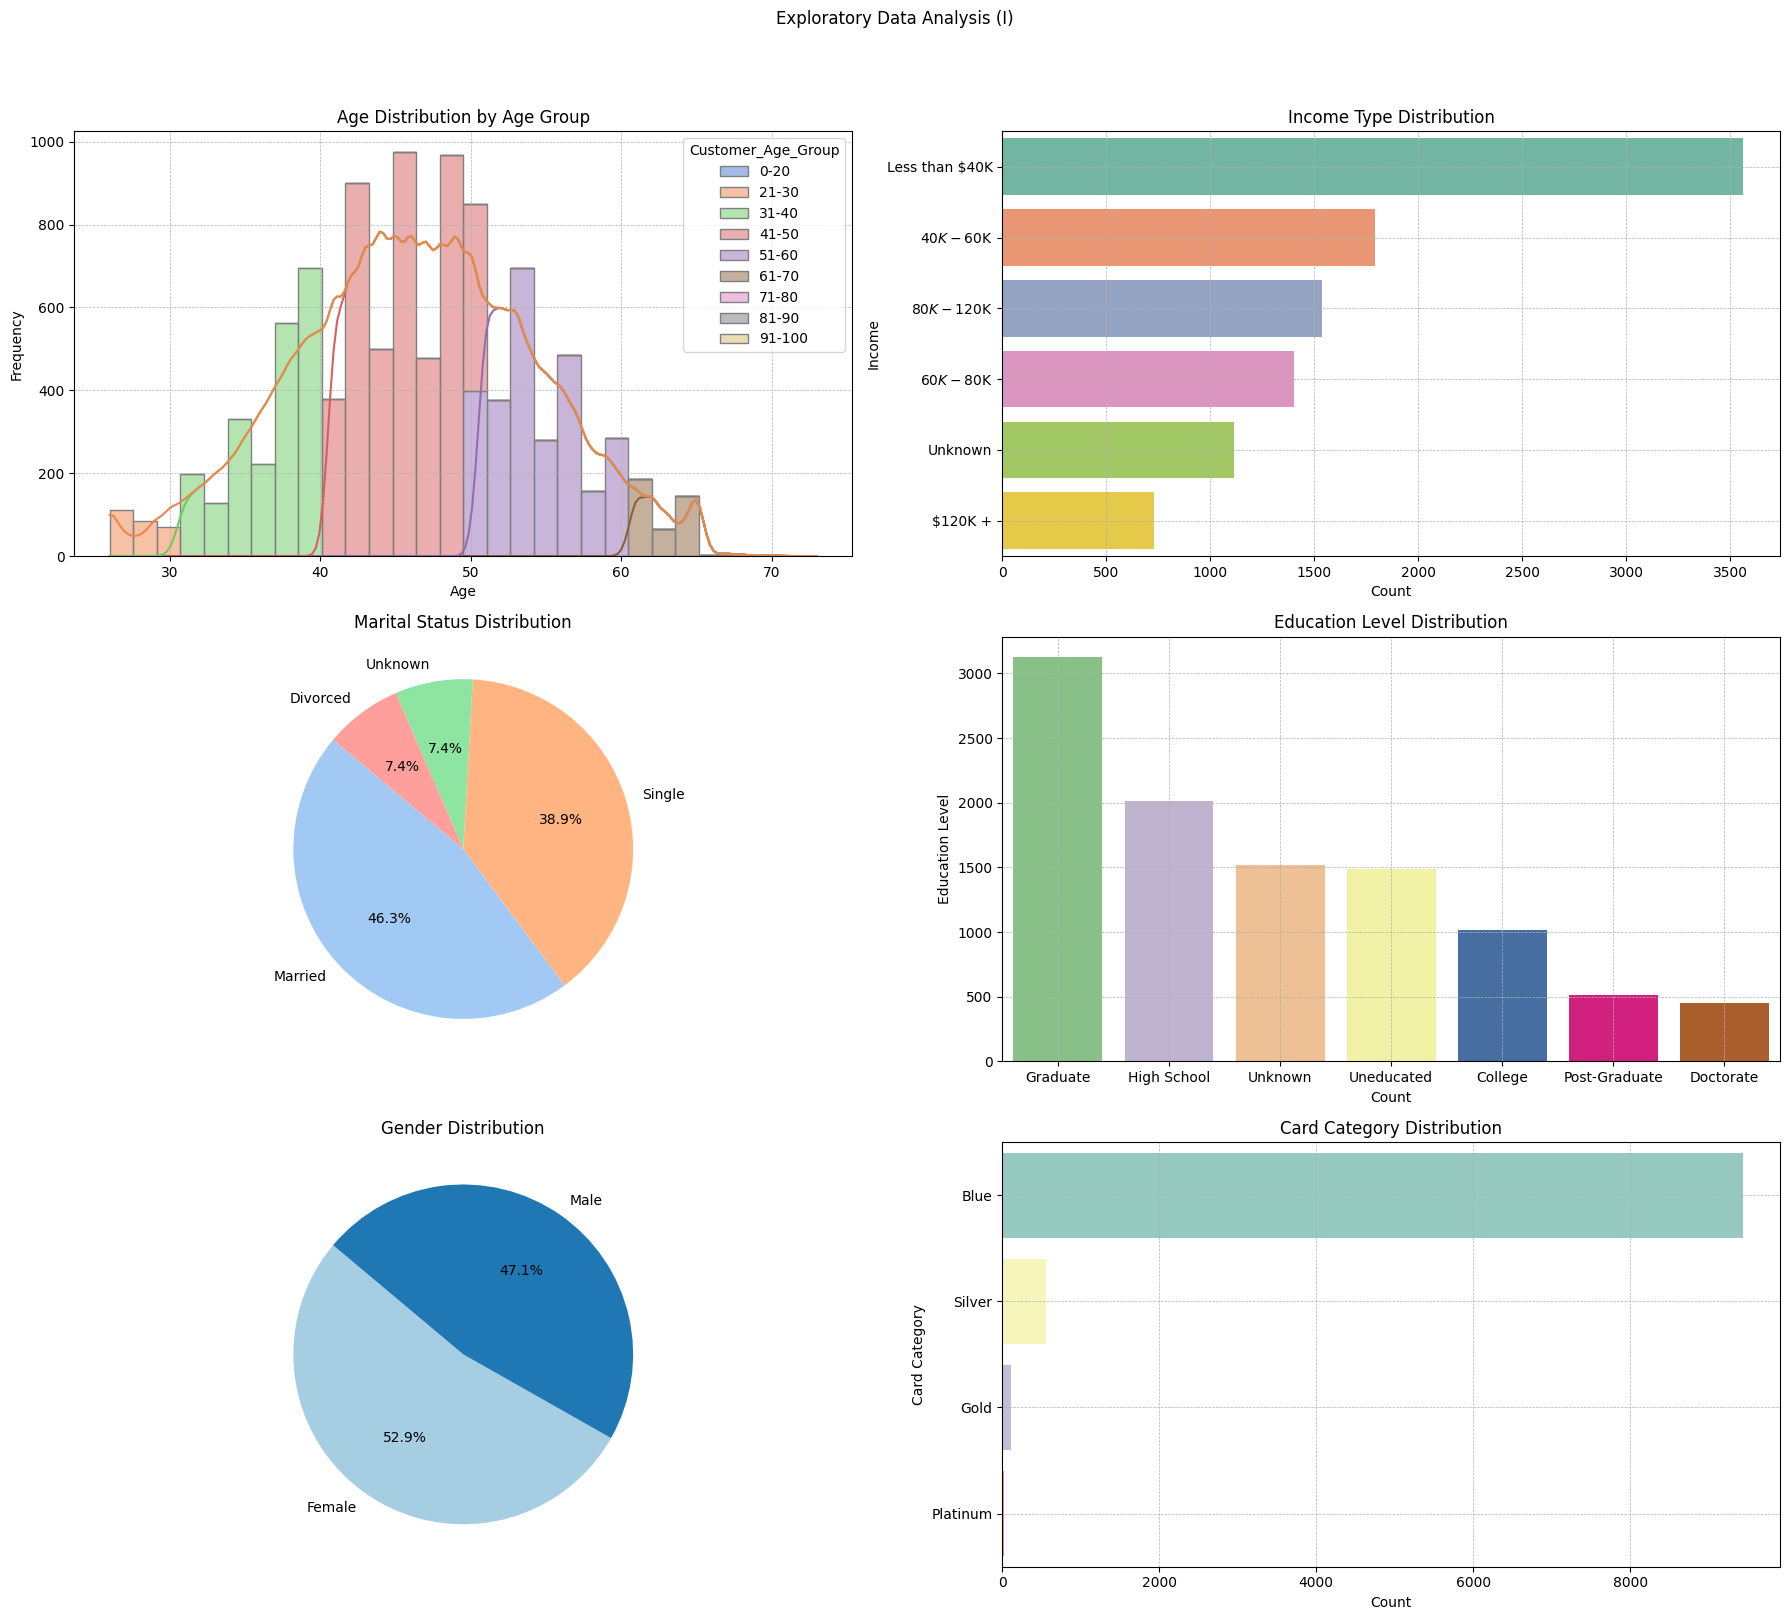

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Subplot area
fig, axes = plt.subplots(3, 2, figsize = (18, 17))
fig.suptitle('Exploratory Data Analysis (I)')

# Age Distribution by Age Group
age_bins = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['Customer_Age_Group'] = pd.cut(df['Customer_Age'], bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels = age_bins)
sns.histplot(data=df, x = 'Customer_Age', hue = 'Customer_Age_Group', multiple = 'stack', palette = 'muted', edgecolor = 'gray', ax = axes[0, 0], bins = 30, kde = True)
axes[0, 0].set_title('Age Distribution by Age Group')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, which = "both", ls = "--", linewidth = 0.5)

# Income Type Distribution
job_types = df['Income_Category'].value_counts().index
colors = sns.color_palette("Set2", len(job_types))
for i, income in enumerate(job_types):
    sns.barplot(x=[df[df['Income_Category'] == income]['Income_Category'].count()], y = [income], ax = axes[0, 1], color = colors[i])
axes[0, 1].set_title('Income Type Distribution')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('Income')
axes[0, 1].grid(True, which = "both", ls = "--", linewidth = 0.5)

# Marital Status Distribution
marital_counts = df['Marital_Status'].value_counts()
axes[1, 0].pie(marital_counts, labels = marital_counts.index, autopct = '%1.1f%%', startangle = 140, colors = sns.color_palette("pastel", len(marital_counts)))
axes[1, 0].set_title('Marital Status Distribution')

# Education Level Distribution
sns.countplot(x = 'Education_Level', data = df, order = df['Education_Level'].value_counts().index, ax = axes[1, 1], palette = 'Accent')
axes[1, 1].set_title('Education Level Distribution')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Education Level')
axes[1, 1].tick_params(axis = 'x', labelsize = 'medium')
axes[1, 1].grid(True, which = "both", ls = "--", linewidth = 0.5)

# Gender Status Distribution
gender_counts = df['Gender'].value_counts()
axes[2, 0].pie(gender_counts, labels = gender_counts.index.map({'F': 'Female', 'M': 'Male'}), autopct = '%1.1f%%', startangle = 140, colors = sns.color_palette("Paired", len(gender_counts)))
axes[2, 0].set_title('Gender Distribution')

# Card Category Distribution
card_category = df['Card_Category'].value_counts().index
colors = sns.color_palette("Set3", len(job_types))
for i, card in enumerate(card_category):
    sns.barplot(x=[df[df['Card_Category'] == card]['Card_Category'].count()], y = [card], ax = axes[2, 1], color = colors[i])
axes[2, 1].set_title('Card Category Distribution')
axes[2, 1].set_xlabel('Count')
axes[2, 1].set_ylabel('Card Category')
axes[2, 1].grid(True, which = "both", ls = "--", linewidth = 0.5)

plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

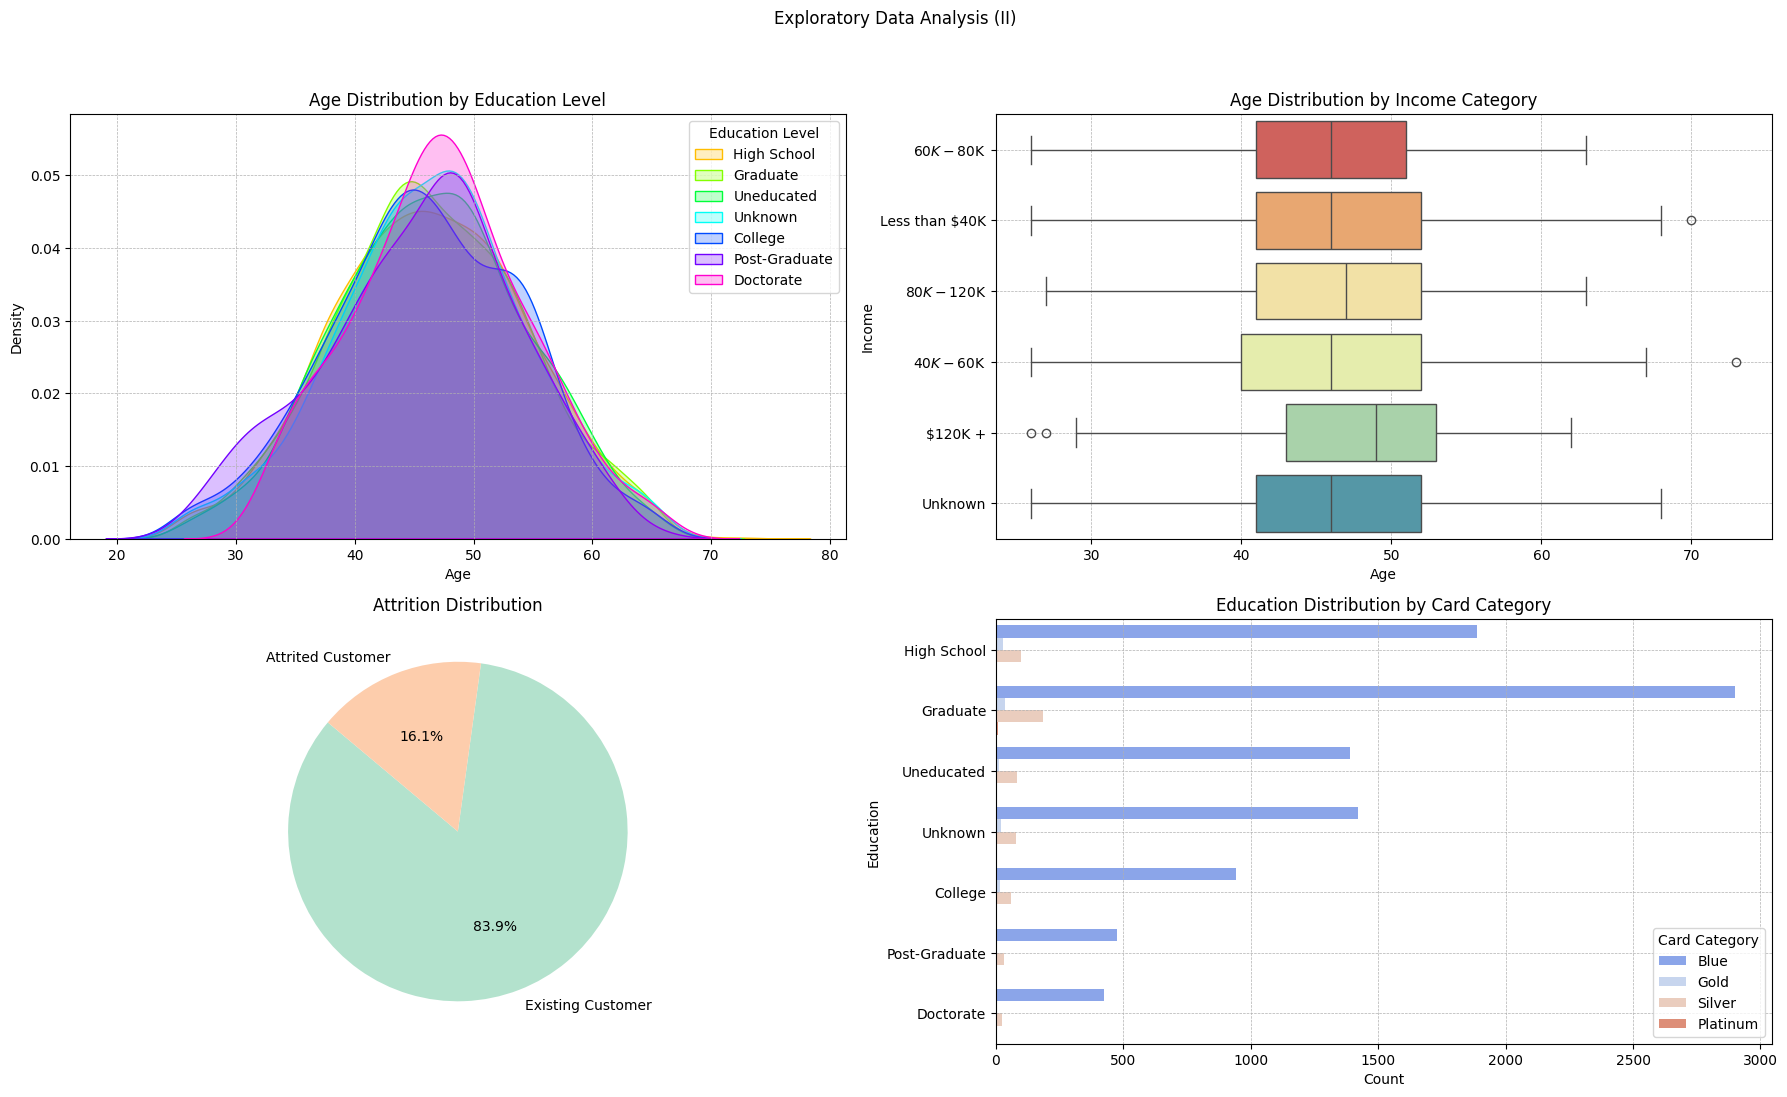

In [6]:
warnings.filterwarnings("ignore")

# Setting up the subplot area
fig, axes = plt.subplots(2, 2, figsize = (18, 11.5))  # Adjust the size as needed
fig.suptitle('Exploratory Data Analysis (II)')

# Age Distribution by Education Level
education_levels = df['Education_Level'].unique()
palette = sns.color_palette("hsv", len(education_levels))
for i, level in enumerate(education_levels):
    sns.kdeplot(df[df['Education_Level'] == level]['Customer_Age'], ax = axes[0, 0], shade = True, label = level, color = palette[i])
axes[0, 0].set_title('Age Distribution by Education Level')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Density')
axes[0, 0].legend(title = 'Education Level')
axes[0, 0].grid(True, which = "both", ls = "--", linewidth = 0.5)

# Age and Income Distribution
sns.boxplot(x = 'Customer_Age', y = 'Income_Category', data = df, ax = axes[0, 1], palette = 'Spectral')
axes[0, 1].set_title('Age Distribution by Income Category')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Income')
axes[0, 1].grid(True)
axes[0, 1].grid(True, which = "both", ls = "--", linewidth = 0.5)

# Attrition Flag Distribution
attrition_counts = df['Attrition_Flag'].value_counts()
axes[1, 0].pie(attrition_counts, labels = attrition_counts.index, autopct = '%1.1f%%', startangle = 140, colors = sns.color_palette("Pastel2", len(attrition_counts)))
axes[1, 0].set_title('Attrition Distribution')

# Education and Card Category Loan Distribution
sns.countplot(y = 'Education_Level', hue = 'Card_Category', data = df, ax = axes[1, 1], palette = 'coolwarm')
axes[1, 1].set_title('Education Distribution by Card Category')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Education')
axes[1, 1].legend(title = 'Card Category')
axes[1, 1].grid(True, which = "both", ls = "--", linewidth = 0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust for the main title and subplots
plt.show()

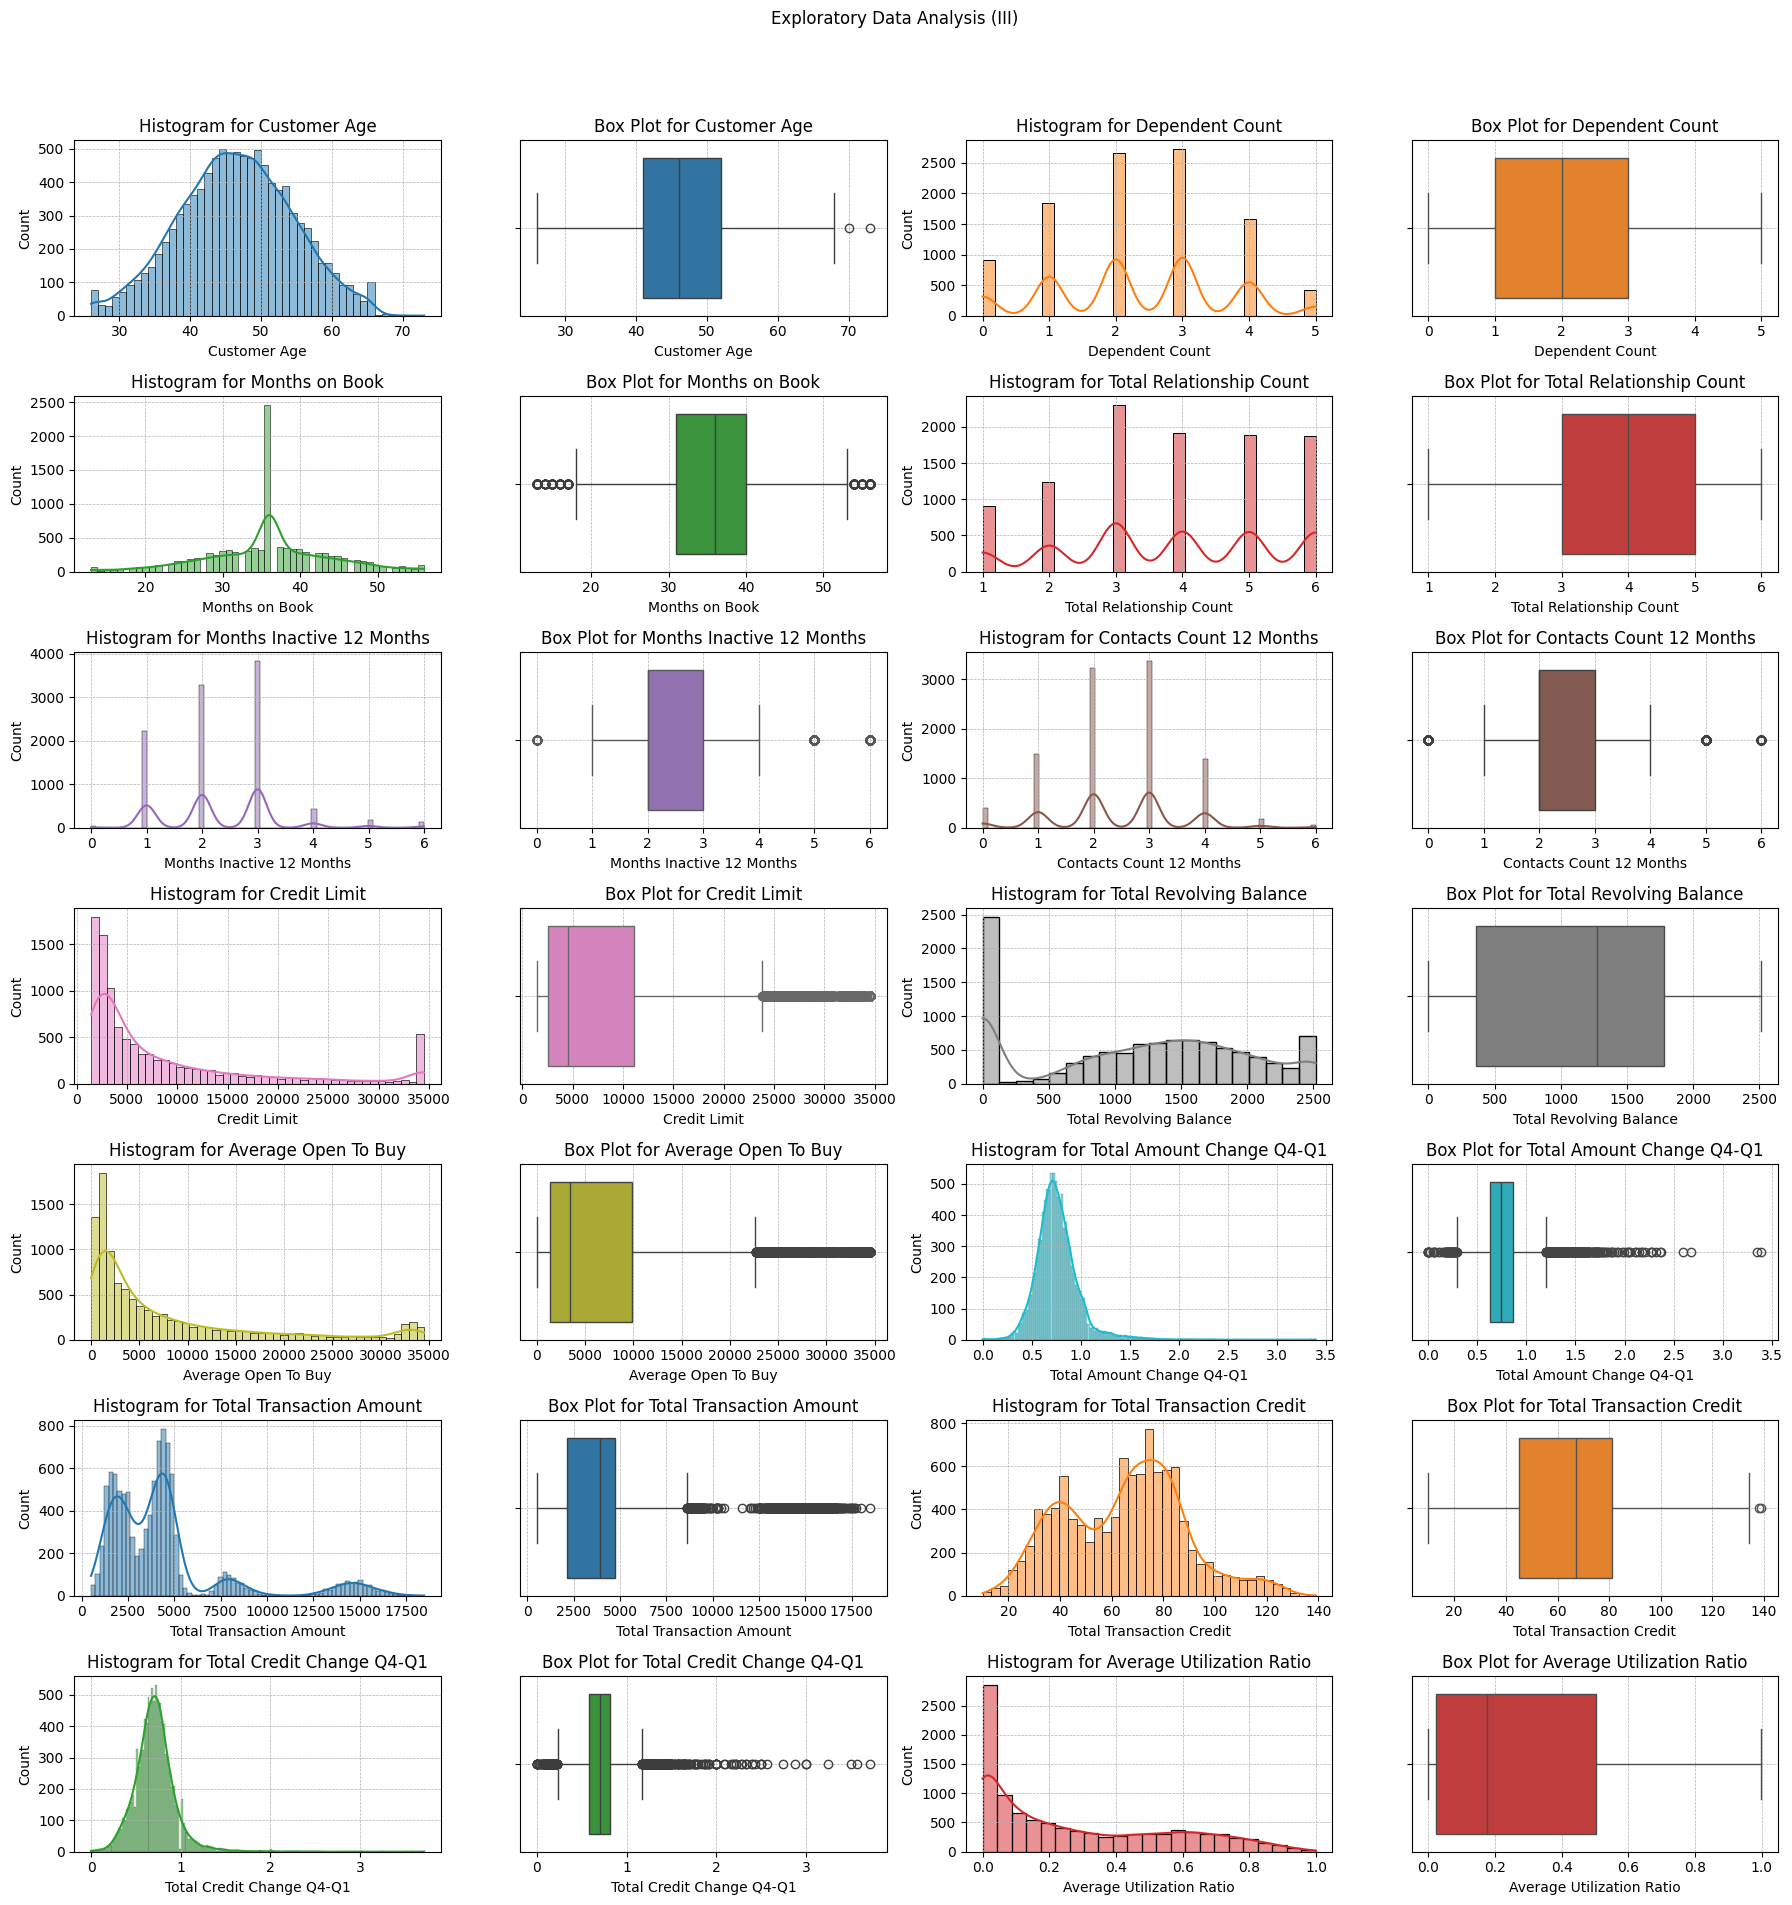

In [7]:
# List of columns to plot
columns_to_plot = {
    "Customer_Age": "Customer Age", 
    "Dependent_count": "Dependent Count", 
    "Months_on_book": "Months on Book", 
    "Total_Relationship_Count": "Total Relationship Count",
    "Months_Inactive_12_mon": "Months Inactive 12 Months", 
    "Contacts_Count_12_mon": "Contacts Count 12 Months", 
    "Credit_Limit": "Credit Limit",
    "Total_Revolving_Bal": "Total Revolving Balance", 
    "Avg_Open_To_Buy": "Average Open To Buy", 
    "Total_Amt_Chng_Q4_Q1": "Total Amount Change Q4-Q1",
    "Total_Trans_Amt": "Total Transaction Amount", 
    "Total_Trans_Ct": "Total Transaction Credit", 
    "Total_Ct_Chng_Q4_Q1": "Total Credit Change Q4-Q1",
    "Avg_Utilization_Ratio": "Average Utilization Ratio"
}

# Set the color palette
palette = sns.color_palette("tab10")

rows_needed = 7

fig, axes = plt.subplots(nrows=rows_needed, ncols=4, figsize=(18, 20))
fig.suptitle('Exploratory Data Analysis (III)')

# Loop through the list and create a histogram and boxplot for each numerical column
for i, (column_key, column_name) in enumerate(columns_to_plot.items()):
    # Histogram
    sns.histplot(df[column_key], ax=axes[i // 2, (i % 2) * 2], kde=True, color=palette[i % len(palette)])
    axes[i // 2, (i % 2) * 2].set_title(f'Histogram for {column_name}')
    axes[i // 2, (i % 2) * 2].set_xlabel(column_name)
    axes[i // 2, (i % 2) * 2].grid(True, which="both", ls="--", linewidth=0.5)
    
    # Box plot
    sns.boxplot(x=df[column_key], ax=axes[i // 2, (i % 2) * 2 + 1], color=palette[i % len(palette)])
    axes[i // 2, (i % 2) * 2 + 1].set_title(f'Box Plot for {column_name}')
    axes[i // 2, (i % 2) * 2 + 1].set_xlabel(column_name)
    axes[i // 2, (i % 2) * 2 + 1].grid(True, which="both", ls="--", linewidth=0.5)


# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [8]:
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Insights Gained from Initial Exploration </span>
<div style="text-align: justify;">

- El número del cliente es irrelevante para el análisis, por lo que se elimina dicha columna.
</div>

In [9]:
df = df.drop(columns=['CLIENTNUM'])
df = df.drop(columns=['Customer_Age_Group'])

- El salario de los clientes en uno de los factores críticos para los servicios provistos por la compañía de tarjetas de crédito. Se excluyen aquellos clientes cuyos ingresos son desconocidos, lo que servirá para segmentar a los clientes de manera más efectiva.

In [10]:
df['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

In [11]:
df = df.drop(df[df['Income_Category'] == 'Unknown'].index)

- Se agrupan los clientes divorciados con los clientes solteros dado que el aspecto importante para el análisis es saber si el cliente tiene pareja o no.

In [12]:
df['Marital_Status'].value_counts()

Marital_Status
Married     4194
Single      3499
Unknown      667
Divorced     655
Name: count, dtype: int64

In [13]:
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced'], 'Single')

- Como el porcentaje de los clientes que tienen una tarjeta Oro o Platino es tan pequeño, se agrupan estas categorías con las tarjetas Plata, creando una nueva categoría, principalmente para distinguir estos clientes de aquellos que poseen la tarjeta más básica.

In [14]:
df['Card_Category'].value_counts()

Card_Category
Blue        8391
Silver       502
Gold         107
Platinum      15
Name: count, dtype: int64

In [15]:
df['Card_Category'] = df['Card_Category'].replace(['Silver', 'Gold', 'Platinum'], 'Silver+')

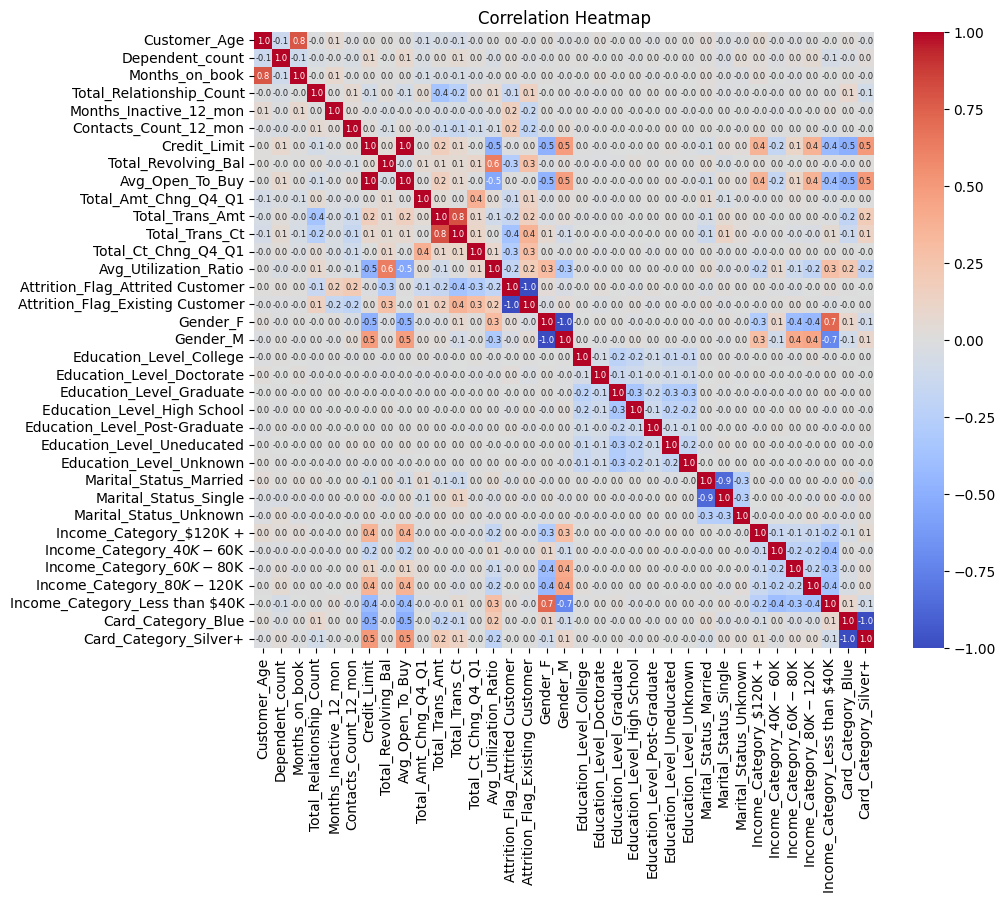

In [16]:
df_dummies = pd.get_dummies(df)

# Plot Correlation Heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(df_dummies.corr(), annot=True, cmap = "coolwarm", fmt = ".1f", annot_kws = {"size": 6})
plt.title("Correlation Heatmap", fontsize=12)
plt.show()

- Se elimina la columna `Avg_Open_To_Buy` puesto que tiene correlación perfecta con `Credit_Limit` y sería redundante mantener ambas variables

In [17]:
df = df.drop(columns=['Avg_Open_To_Buy'])

- Se inspeccionan aquellas columnas que presentan *outliers* significativos que están alejados de los distribución de los datos

    - `Total Transaction Amount`: indicar hábitos de gasto de los clientes. Los *outliers* aquí podrían representar a grandes gastadores o transacciones atípicas. Si bien estos casos pueden ser atípicos, pueden proporcionar información crucial sobre el *churn*, como por ejemplo, si los clientes que gastan más son menos propensos a abandonar. Por tanto, no se quitan estos *outliers*.

    - `Total Credit Change Q4-Q1`: cambios significativos en el crédito de un cliente podrían ser un indicativo de cambios importantes en su vida financiera que podrían afectar su lealtad. Se mantenienen estos outliers, ya que podrían tener un impacto directo en la predicción de churn.

    - `Credit Limit`: límite de crédito disponible. Los *outliers* podrían ser clientes con líneas de crédito significativamente más altas que el promedio. Estos clientes podrían tener un comportamiento diferente al resto y, por lo tanto, podrían ser importantes de mantener para entender el *churn*.

    - `Total Amount Change Q4-Q1`: cambios en el cantidad total podrían sugerir eventos significativos. Podría ser relevante conservar estos datos, ya que los cambios drásticos en el comportamiento de gasto pueden estar relacionados con la decisión de *churn*.

In [18]:
def remove_outliers(df, columns):

    # Create a copy of the dataframe
    clean_df = df.copy()
    
    for column in columns:
        Q1 = clean_df[column].quantile(0.25)
        Q3 = clean_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 4 * IQR
        upper_bound = Q3 + 4 * IQR
        
        clean_df = clean_df[(clean_df[column] >= lower_bound) & (clean_df[column] <= upper_bound)]
        
    return clean_df

columns_to_check = ["Total_Amt_Chng_Q4_Q1", "Total_Ct_Chng_Q4_Q1"]

df_no_outliers = remove_outliers(df, columns_to_check)

In [19]:
df = df_no_outliers

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8951 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            8951 non-null   object 
 1   Customer_Age              8951 non-null   int64  
 2   Gender                    8951 non-null   object 
 3   Dependent_count           8951 non-null   int64  
 4   Education_Level           8951 non-null   object 
 5   Marital_Status            8951 non-null   object 
 6   Income_Category           8951 non-null   object 
 7   Card_Category             8951 non-null   object 
 8   Months_on_book            8951 non-null   int64  
 9   Total_Relationship_Count  8951 non-null   int64  
 10  Months_Inactive_12_mon    8951 non-null   int64  
 11  Contacts_Count_12_mon     8951 non-null   int64  
 12  Credit_Limit              8951 non-null   float64
 13  Total_Revolving_Bal       8951 non-null   int64  
 14  Total_Amt_Ch

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 3. Data Preprocessing </span>

In [21]:
one_hot_cols = ["Gender", "Education_Level", "Marital_Status", "Income_Category", 
                "Card_Category", "Dependent_count", "Total_Relationship_Count", 
                "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Attrition_Flag"]
standard_cols = ["Customer_Age", "Total_Amt_Chng_Q4_Q1", "Total_Ct_Chng_Q4_Q1", "Months_on_book"]
minmax_cols = ["Total_Trans_Amt", "Total_Trans_Ct"]
power_cols = ["Total_Revolving_Bal", "Credit_Limit", "Avg_Utilization_Ratio"]

In [22]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
import numpy as np

preprocessing = ColumnTransformer(
    [
        ("one-hot", OneHotEncoder(), one_hot_cols),
        ("standard", StandardScaler(), standard_cols),
        ("minmax", MinMaxScaler(), minmax_cols),
        ("power", PowerTransformer(), power_cols),
    ]
)

df_scaled = preprocessing.fit_transform(df)
one_hot_cols_encoded = preprocessing.named_transformers_['one-hot'].get_feature_names_out(one_hot_cols)
standard_cols_encoded = preprocessing.named_transformers_['standard'].get_feature_names_out(standard_cols)
minmax_cols_encoded = preprocessing.named_transformers_['minmax'].get_feature_names_out(minmax_cols)
power_cols_encoded = preprocessing.named_transformers_['power'].get_feature_names_out(power_cols)
columns_labels = np.concatenate([one_hot_cols_encoded, standard_cols_encoded, minmax_cols_encoded, power_cols_encoded])

df_scaled = pd.DataFrame(df_scaled, columns = columns_labels)

In [23]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8951 entries, 0 to 8950
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender_F                          8951 non-null   float64
 1   Gender_M                          8951 non-null   float64
 2   Education_Level_College           8951 non-null   float64
 3   Education_Level_Doctorate         8951 non-null   float64
 4   Education_Level_Graduate          8951 non-null   float64
 5   Education_Level_High School       8951 non-null   float64
 6   Education_Level_Post-Graduate     8951 non-null   float64
 7   Education_Level_Uneducated        8951 non-null   float64
 8   Education_Level_Unknown           8951 non-null   float64
 9   Marital_Status_Married            8951 non-null   float64
 10  Marital_Status_Single             8951 non-null   float64
 11  Marital_Status_Unknown            8951 non-null   float64
 12  Income

In [24]:
X = df_scaled.drop(['Attrition_Flag_Attrited Customer', 'Attrition_Flag_Existing Customer'], axis = 1)
X = X.drop(['Gender_M'], axis = 1)
y = df_scaled['Attrition_Flag_Attrited Customer']

In [25]:
from sklearn.model_selection import train_test_split

# Dividing the dataset in training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42, stratify = y)

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 4. Association Rules </span>

In [26]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

nominal_categories = {
    'Attrition_Flag': 'Attrition',
    'Gender': 'Gender',
    'Education_Level': 'Education Level',
    'Marital_Status': 'Marital Status',
    'Income_Category': 'Income Level',
    'Card_Category': 'Card Category'
}

one_hot_feature_names = []

for key in nominal_categories.keys():
    one_hot_feature_names.extend([col for col in df_scaled.columns if col.startswith(key)])

# Select only nominal categories form Apriori Algorithm
df_rules = df_scaled[one_hot_feature_names].astype(bool)

# Apply the Apriori Algorithm to find frequent itemsets. Sort them by support
frequent_itemsets = apriori(df_rules, min_support = 0.35, use_colnames = True, verbose = 1).sort_values(by = 'support', ascending = False)
frequent_itemsets

Processing 45 combinations | Sampling itemset size 3


support                                           itemsets
6   0.930957                               (Card_Category_Blue)
0   0.839348                 (Attrition_Flag_Existing Customer)
11  0.781142  (Card_Category_Blue, Attrition_Flag_Existing C...
2   0.521841                                         (Gender_M)
1   0.478159                                         (Gender_F)
14  0.474137                     (Card_Category_Blue, Gender_M)
3   0.463971                           (Marital_Status_Married)
4   0.461960                            (Marital_Status_Single)
13  0.456820                     (Gender_F, Card_Category_Blue)
8   0.444755       (Gender_M, Attrition_Flag_Existing Customer)
15  0.437716       (Card_Category_Blue, Marital_Status_Married)
16  0.425539        (Card_Category_Blue, Marital_Status_Single)
19  0.404648  (Card_Category_Blue, Gender_M, Attrition_Flag_...
5   0.396269                   (Income_Category_Less than $40K)
7   0.394593       (Gender_F, Attrition_Flag_Existing Customer)
9   0.393699  (Marital_Status_Married, Attrition_Flag_Existi...
10  0.384091  (Marital_Status_Single, Attrition_Flag_Existin...
17  0.378729  (Card_Category_Blue, Income_Category_Less than...
18  0.376494  (Gender_F, Card_Category_Blue, Attrition_Flag_...
20  0.370908  (Marital_Status_Married, Card_Category_Blue, A...
12  0.365322         (Gender_F, Income_Category_Less than $40K)
21  0.354150  (Card_Category_Blue, Marital_Status_Single, At...
22  0.350017  (Gender_F, Card_Category_Blue, Income_Category...

In [27]:
# Generate and sort Association Rules
rules_confidence = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.9).sort_values(by = 'confidence', ascending = False)
rules_confidence

antecedents           consequents  \
11         (Gender_F, Income_Category_Less than $40K)  (Card_Category_Blue)   
6                    (Income_Category_Less than $40K)  (Card_Category_Blue)   
2                                          (Gender_F)  (Card_Category_Blue)   
7        (Gender_F, Attrition_Flag_Existing Customer)  (Card_Category_Blue)   
3                            (Marital_Status_Married)  (Card_Category_Blue)   
8   (Attrition_Flag_Existing Customer, Marital_Sta...  (Card_Category_Blue)   
0                  (Attrition_Flag_Existing Customer)  (Card_Category_Blue)   
12  (Card_Category_Blue, Income_Category_Less than...            (Gender_F)   
10  (Marital_Status_Single, Attrition_Flag_Existin...  (Card_Category_Blue)   
9                    (Income_Category_Less than $40K)            (Gender_F)   
4                             (Marital_Status_Single)  (Card_Category_Blue)   
5        (Gender_M, Attrition_Flag_Existing Customer)  (Card_Category_Blue)   
1                                          (Gender_M)  (Card_Category_Blue)   

    antecedent support  consequent support   support  confidence      lift  \
11            0.365322            0.930957  0.350017    0.958104  1.029160   
6             0.396269            0.930957  0.378729    0.955737  1.026618   
2             0.478159            0.930957  0.456820    0.955374  1.026227   
7             0.394593            0.930957  0.376494    0.954134  1.024895   
3             0.463971            0.930957  0.437716    0.943414  1.013381   
8             0.393699            0.930957  0.370908    0.942111  1.011981   
0             0.839348            0.930957  0.781142    0.930654  0.999674   
12            0.378729            0.478159  0.350017    0.924189  1.932807   
10            0.384091            0.930957  0.354150    0.922048  0.990429   
9             0.396269            0.478159  0.365322    0.921906  1.928033   
4             0.461960            0.930957  0.425539    0.921161  0.989477   
5             0.444755            0.930957  0.404648    0.909822  0.977297   
1             0.521841            0.930957  0.474137    0.908585  0.975968   

    leverage  conviction  zhangs_metric  
11  0.009917    1.647950       0.044643  
6   0.009819    1.559834       0.042945  
2   0.011675    1.547132       0.048974  
7   0.009145    1.505298       0.040122  
3   0.005780    1.220144       0.024633  
8   0.004391    1.192676       0.019527  
0  -0.000255    0.995618      -0.002028  
12  0.168924    6.883430       0.776823  
10 -0.003422    0.885703      -0.015447  
9   0.175843    6.682204       0.797269  
4  -0.004526    0.875739      -0.019383  
5  -0.009400    0.765622      -0.040158  
1  -0.011675    0.755264      -0.048974

In [28]:
rules_lift = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1.3).sort_values(by = 'lift', ascending = False)
rules_lift

antecedents  \
2                     (Gender_F, Card_Category_Blue)   
5                   (Income_Category_Less than $40K)   
3  (Card_Category_Blue, Income_Category_Less than...   
4                                         (Gender_F)   
0                                         (Gender_F)   
1                   (Income_Category_Less than $40K)   

                                         consequents  antecedent support  \
2                   (Income_Category_Less than $40K)            0.456820   
5                     (Gender_F, Card_Category_Blue)            0.396269   
3                                         (Gender_F)            0.378729   
4  (Card_Category_Blue, Income_Category_Less than...            0.478159   
0                   (Income_Category_Less than $40K)            0.478159   
1                                         (Gender_F)            0.396269   

   consequent support   support  confidence      lift  leverage  conviction  \
2            0.396269  0.350017    0.766202  1.933542  0.168993    2.582278   
5            0.456820  0.350017    0.883282  1.933542  0.168993    4.653763   
3            0.478159  0.350017    0.924189  1.932807  0.168924    6.883430   
4            0.378729  0.350017    0.732009  1.932807  0.168924    2.318258   
0            0.396269  0.365322    0.764019  1.928033  0.175843    2.558387   
1            0.478159  0.365322    0.921906  1.928033  0.175843    6.682204   

   zhangs_metric  
2       0.888867  
5       0.799717  
3       0.776823  
4       0.924837  
0       0.922381  
1       0.797269

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 5. Decision Tree - CART </span>

Los árboles de decisión, como los CART, pueden sesgarse hacia la clase mayoritaria, ya que su proceso de creación de árboles frecuentemente se basa en la pureza de los nodos, que favorecerá la clasificación de la clase más frecuente. 

Cuando se le da más peso a la clase minoritaria y menos peso a la clase mayoritaria, el algoritmo presta más atención a la clase minoritaria durante el entrenamiento. Esto permite que el modelo aprenda de los datos desequilibrados de manera más efectiva, lo que conduce a un mejor desempeño en la predicción de la clase minoritaria. Es por ello que se configura el parámetro `class_weight` con el valor `balanced`.

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Creating the model with decision tree
cart_model = DecisionTreeClassifier(
            max_depth = 10,
            criterion = 'gini',
            class_weight = 'balanced',
            random_state = 42
          )

# Fit the model
cart_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)

CART Decision Tree Depth: 10
Number of Leaves or Terminal Nodes: 188


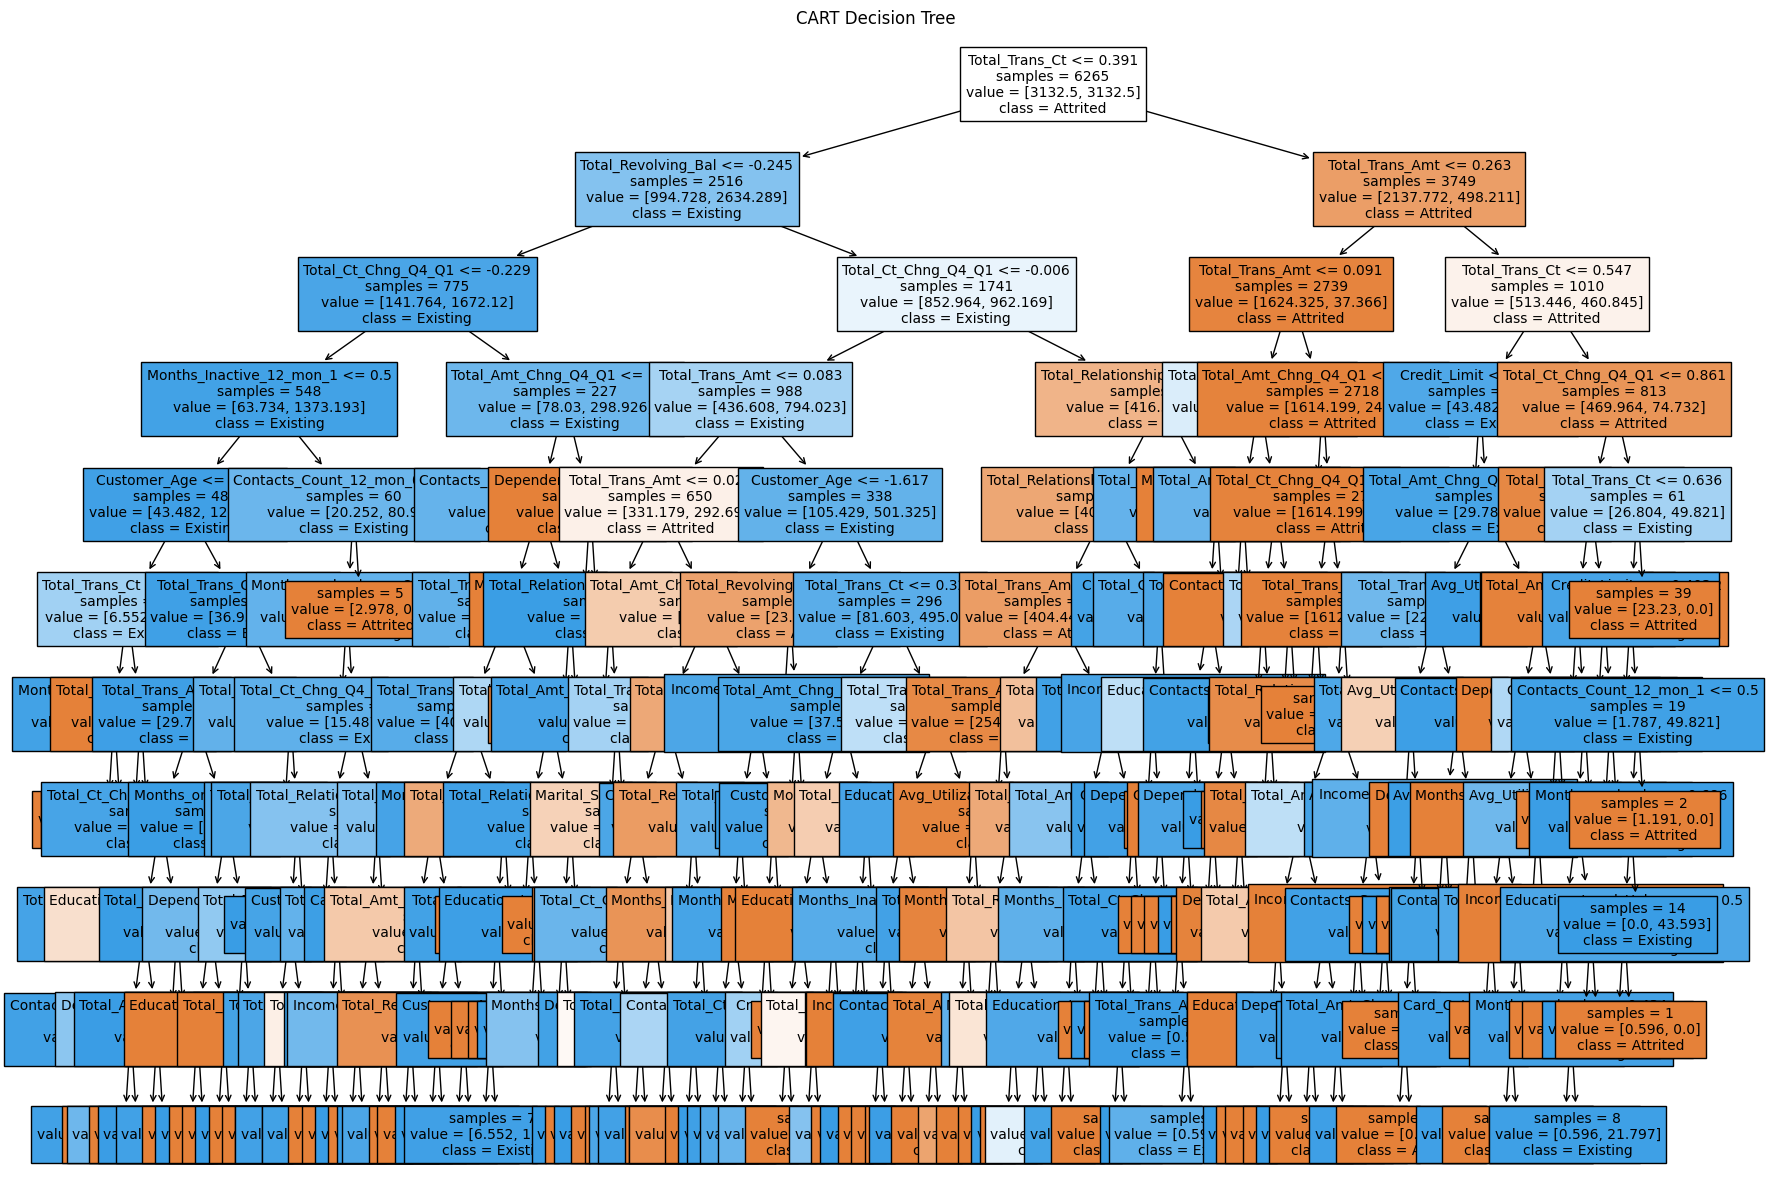

In [30]:
from sklearn.tree import plot_tree

print(f"CART Decision Tree Depth: {cart_model.get_depth()}")
print(f"Number of Leaves or Terminal Nodes: {cart_model.get_n_leaves()}")

# Set the size of the plot
fig, ax = plt.subplots(figsize=(20, 15))

# Plot the decision tree
plot = plot_tree(
    decision_tree = cart_model,  # Plotting the first tree in the forest
    feature_names = X_train.columns.tolist(),
    class_names = ['Attrited', 'Existing'],
    filled = True,
    impurity = False,
    fontsize = 10,
    ax = ax
)

# Add title and other customizations to match the style of your OOB error graph
ax.set_title("CART Decision Tree", fontsize = 12)

# Show the plot
plt.show()

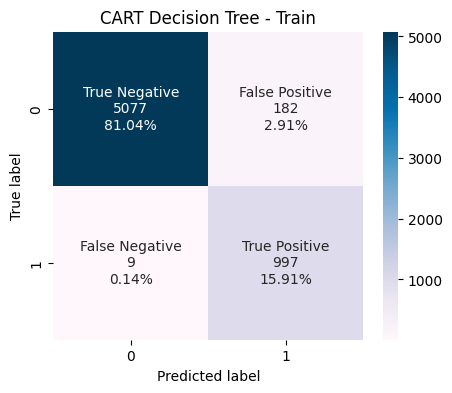

In [31]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_train, cart_model.predict(X_train), labels = cart_model.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('CART Decision Tree - Train', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()


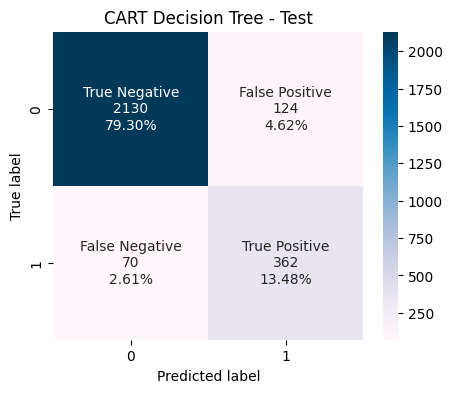

In [32]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, cart_model.predict(X_test), labels = cart_model.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('CART Decision Tree - Test', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()


## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 5.1. Pruning Analysis</span>

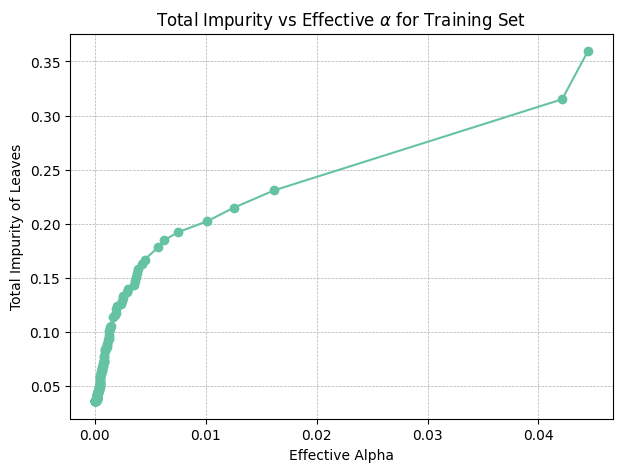

In [33]:
# Analyzing Pruning

path = cart_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

sns.set_palette("Set2")
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], "o-")
ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Total Impurity of Leaves")
ax.set_title(r'Total Impurity vs Effective $\alpha$ for Training Set', fontsize = 12)
plt.grid(True, which = "both", ls = "--", linewidth = 0.5)

In [34]:
# Different alpha options are tried
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of Nodes in the Last Tree is: {} with ccp_alpha = {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of Nodes in the Last Tree is: 1 with ccp_alpha = 0.14050561035549736


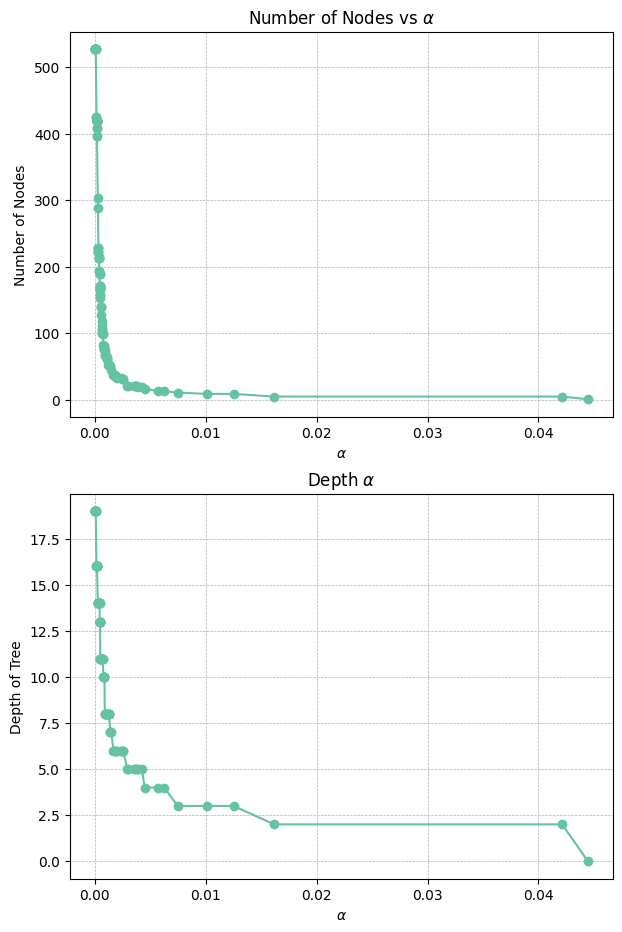

In [35]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(7, 11))
ax[0].plot(ccp_alphas, node_counts, "o-")
ax[0].set_xlabel(r'$\alpha$')
ax[0].set_ylabel("Number of Nodes")
ax[0].set_title(r'Number of Nodes vs $\alpha$', fontsize = 12)
ax[0].grid(True, which = "both", ls = "--", linewidth = 0.5)
ax[1].plot(ccp_alphas, depth, "o-")
ax[1].set_xlabel(r'$\alpha$')
ax[1].set_ylabel("Depth of Tree")
ax[1].set_title(r'Depth $\alpha$', fontsize = 12)
ax[1].grid(True, which = "both", ls = "--", linewidth = 0.5)


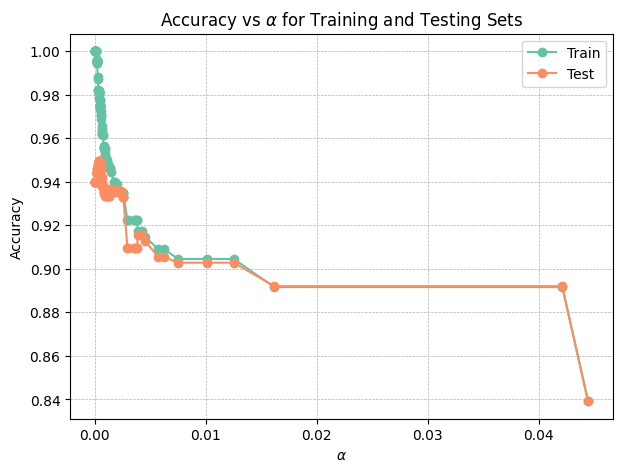

In [36]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(7, 5))
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel("Accuracy")
ax.set_title(r'Accuracy vs $\alpha$ for Training and Testing Sets', fontsize = 12)
ax.plot(ccp_alphas, train_scores, "o-", label = "Train")
ax.plot(ccp_alphas, test_scores, "o-", label = "Test")
ax.legend()
plt.grid(True, which = "both", ls = "--", linewidth = 0.5)
plt.show()

In [37]:
ccp_alphas_df = pd.DataFrame({'ccp_alphas': ccp_alphas, 'train_scores': train_scores, 'test_scores': test_scores})
ccp_alphas_df = ccp_alphas_df.sort_values(['test_scores'], ascending = False)
ccp_alphas_df.head(10)

ccp_alphas  train_scores  test_scores
58    0.000351      0.981165     0.949367
60    0.000363      0.980846     0.949367
62    0.000366      0.980846     0.949367
59    0.000362      0.980846     0.949367
61    0.000363      0.980846     0.949367
55    0.000338      0.981804     0.948995
56    0.000339      0.981804     0.948995
57    0.000339      0.981804     0.948995
53    0.000327      0.982123     0.947878
52    0.000325      0.982123     0.947878

In [38]:
# Obtaining the best alpha from the previous list
best_alpha= ccp_alphas_df.iloc[0][0]
best_alpha


0.00035064629251831104

In [39]:
# Fit the pruned tree with best alpha
pruned_tree_I = DecisionTreeClassifier(ccp_alpha = best_alpha, random_state = 42, class_weight = 'balanced')
pruned_tree_I.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00035064629251831104,
                       class_weight='balanced', random_state=42)

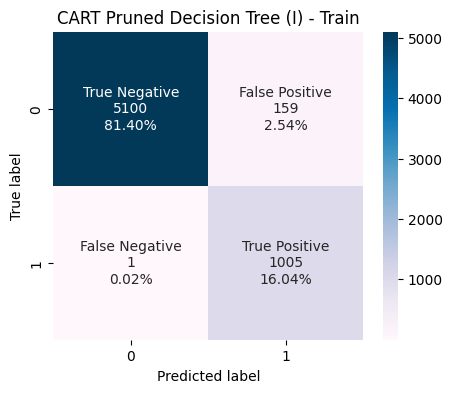

In [40]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train, pruned_tree_I.predict(X_train), labels = pruned_tree_I.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('CART Pruned Decision Tree (I) - Train', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()


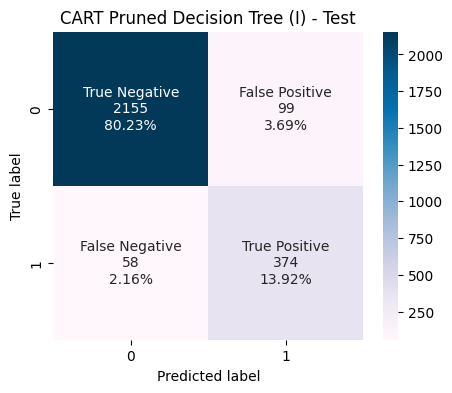

In [41]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, pruned_tree_I.predict(X_test), labels = pruned_tree_I.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('CART Pruned Decision Tree (I) - Test', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()


CART Pruned Decision Tree (I) Depth: 17
Number of Leaves or Terminal Nodes: 141


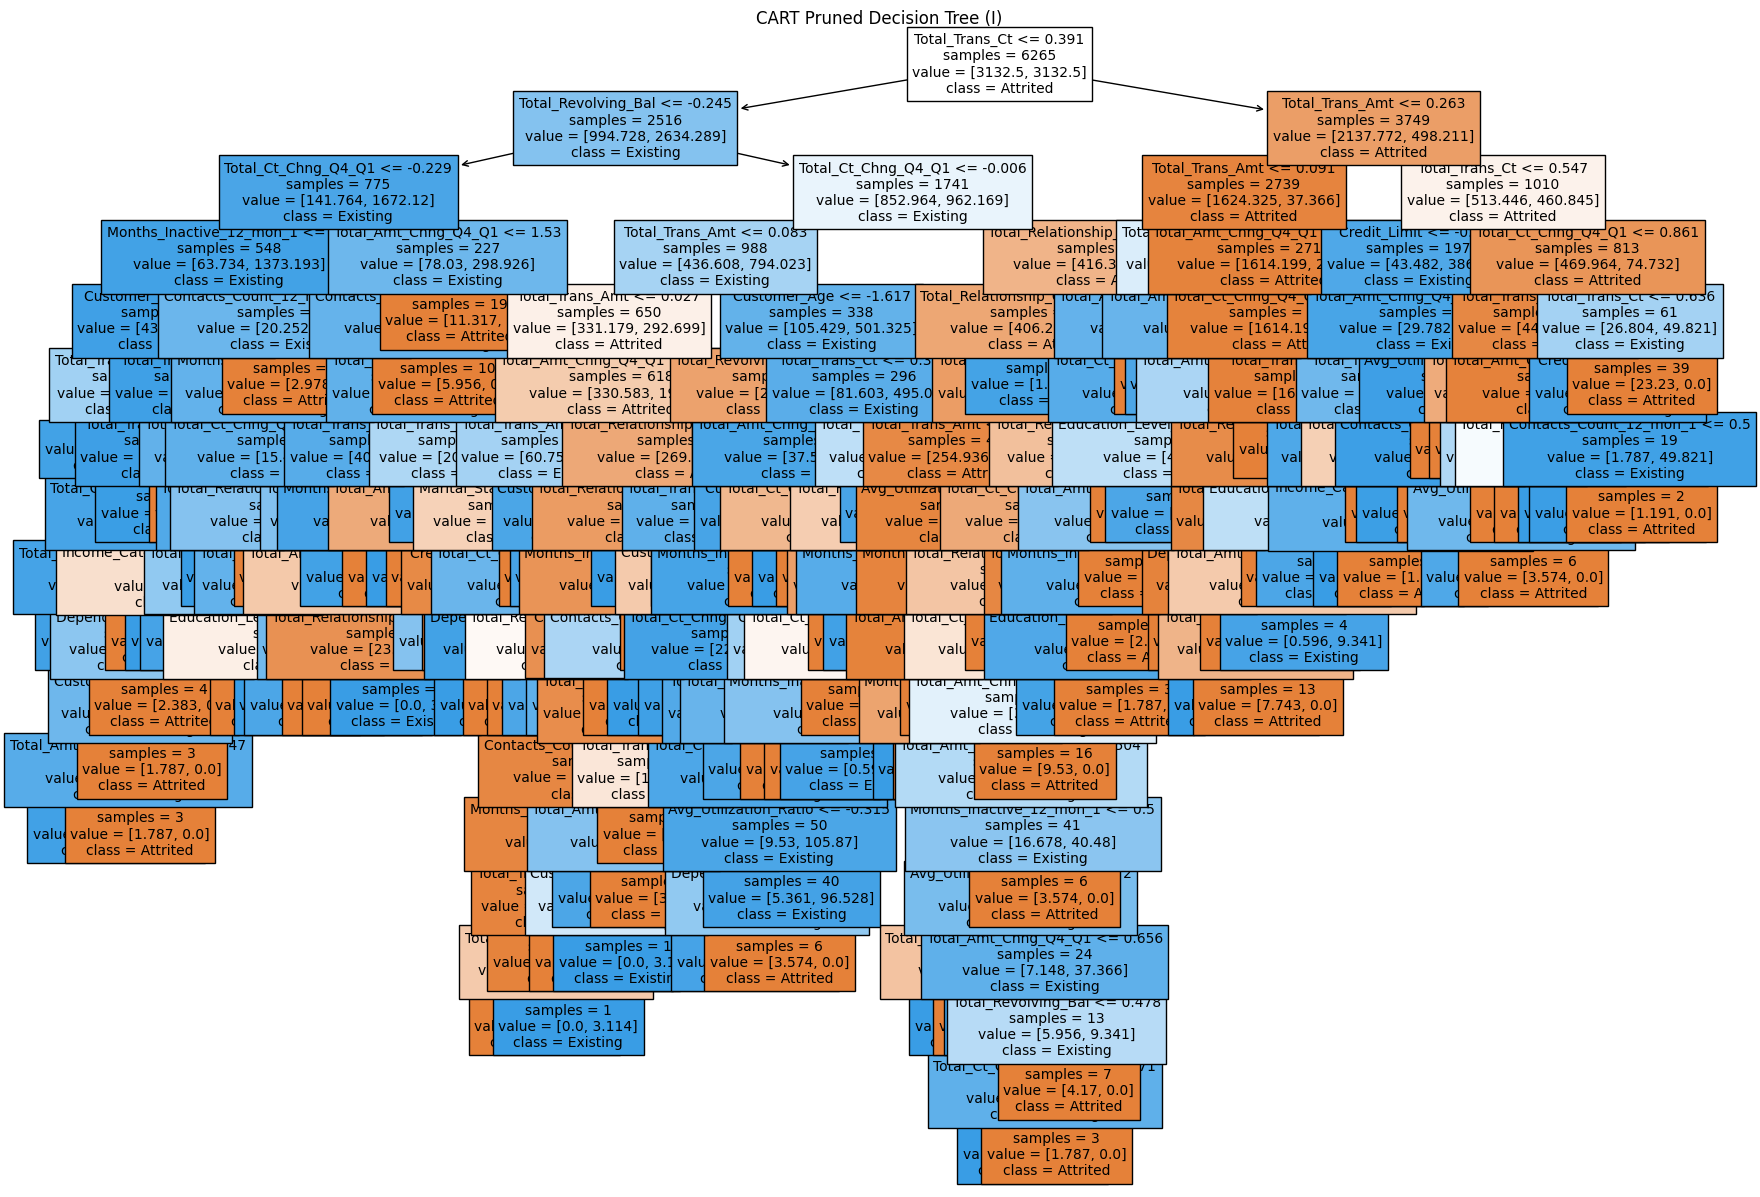

In [42]:
print(f"CART Pruned Decision Tree (I) Depth: {pruned_tree_I.get_depth()}")
print(f"Number of Leaves or Terminal Nodes: {pruned_tree_I.get_n_leaves()}")

# Set the size of the plot
fig, ax = plt.subplots(figsize=(20, 15))

# Plot the decision tree
plot = plot_tree(
    decision_tree = pruned_tree_I,  # Plotting the first tree in the forest
    feature_names = X_train.columns.tolist(),
    class_names = ['Attrited', 'Existing'],
    filled = True,
    impurity = False,
    fontsize = 10,
    ax = ax
)

# Add title and other customizations to match the style of your OOB error graph
ax.set_title("CART Pruned Decision Tree (I)", fontsize = 12)

# Show the plot
plt.show()

In [43]:
from sklearn.model_selection import GridSearchCV

#  Alternative method using GridSearchCV to fine tune method parameters
param_grid = {
    'max_depth':[5, 8, 10, 15],
    'min_samples_split':[10, 30, 50, 60, 70],
    'min_impurity_decrease': [0.0001, 0.0005, 0.001, 0.005, 0.01]
}

gridSearch = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid, cv = 10, n_jobs = 1)
gridSearch.fit(X_train, y_train)

print('Initial Score: ', gridSearch.best_score_)
print('Initial Parameters: ', gridSearch.best_params_)


Initial Score:  0.9382275759104413
Initial Parameters:  {'max_depth': 15, 'min_impurity_decrease': 0.0005, 'min_samples_split': 10}


In [44]:
# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': [6, 7, 8, 9, 10],
    'min_samples_split': [8, 10, 12, 15],
    'min_impurity_decrease': [0.0001, 0.0003, 0.0005, 0.0007, 0.001],
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid, cv = 10, n_jobs = -1)
gridSearch.fit(X_train, y_train)

print('Improved Score: ', gridSearch.best_score_)
print('Improved Parameters: ', gridSearch.best_params_)
bestClassTree = gridSearch.best_estimator_

Improved Score:  0.9393447676699737
Improved Parameters:  {'max_depth': 9, 'min_impurity_decrease': 0.0003, 'min_samples_split': 12}


In [45]:
# Fit the pruned tree with improved parameters
pruned_tree_II = DecisionTreeClassifier(random_state = 42, max_depth = 9, min_impurity_decrease = 0.0003, min_samples_split = 12, class_weight = 'balanced')
pruned_tree_II.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=9,
                       min_impurity_decrease=0.0003, min_samples_split=12,
                       random_state=42)

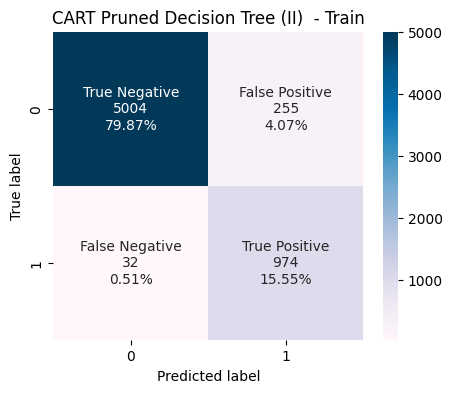

In [46]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train, pruned_tree_II.predict(X_train), labels = pruned_tree_II.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('CART Pruned Decision Tree (II)  - Train', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

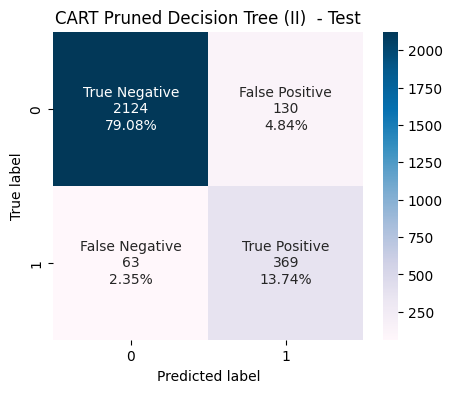

In [47]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, pruned_tree_II.predict(X_test), labels = pruned_tree_II.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('CART Pruned Decision Tree (II)  - Test', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

CART Pruned Decision Tree (II) Depth: 9
Number of Leaves or Terminal Nodes: 83


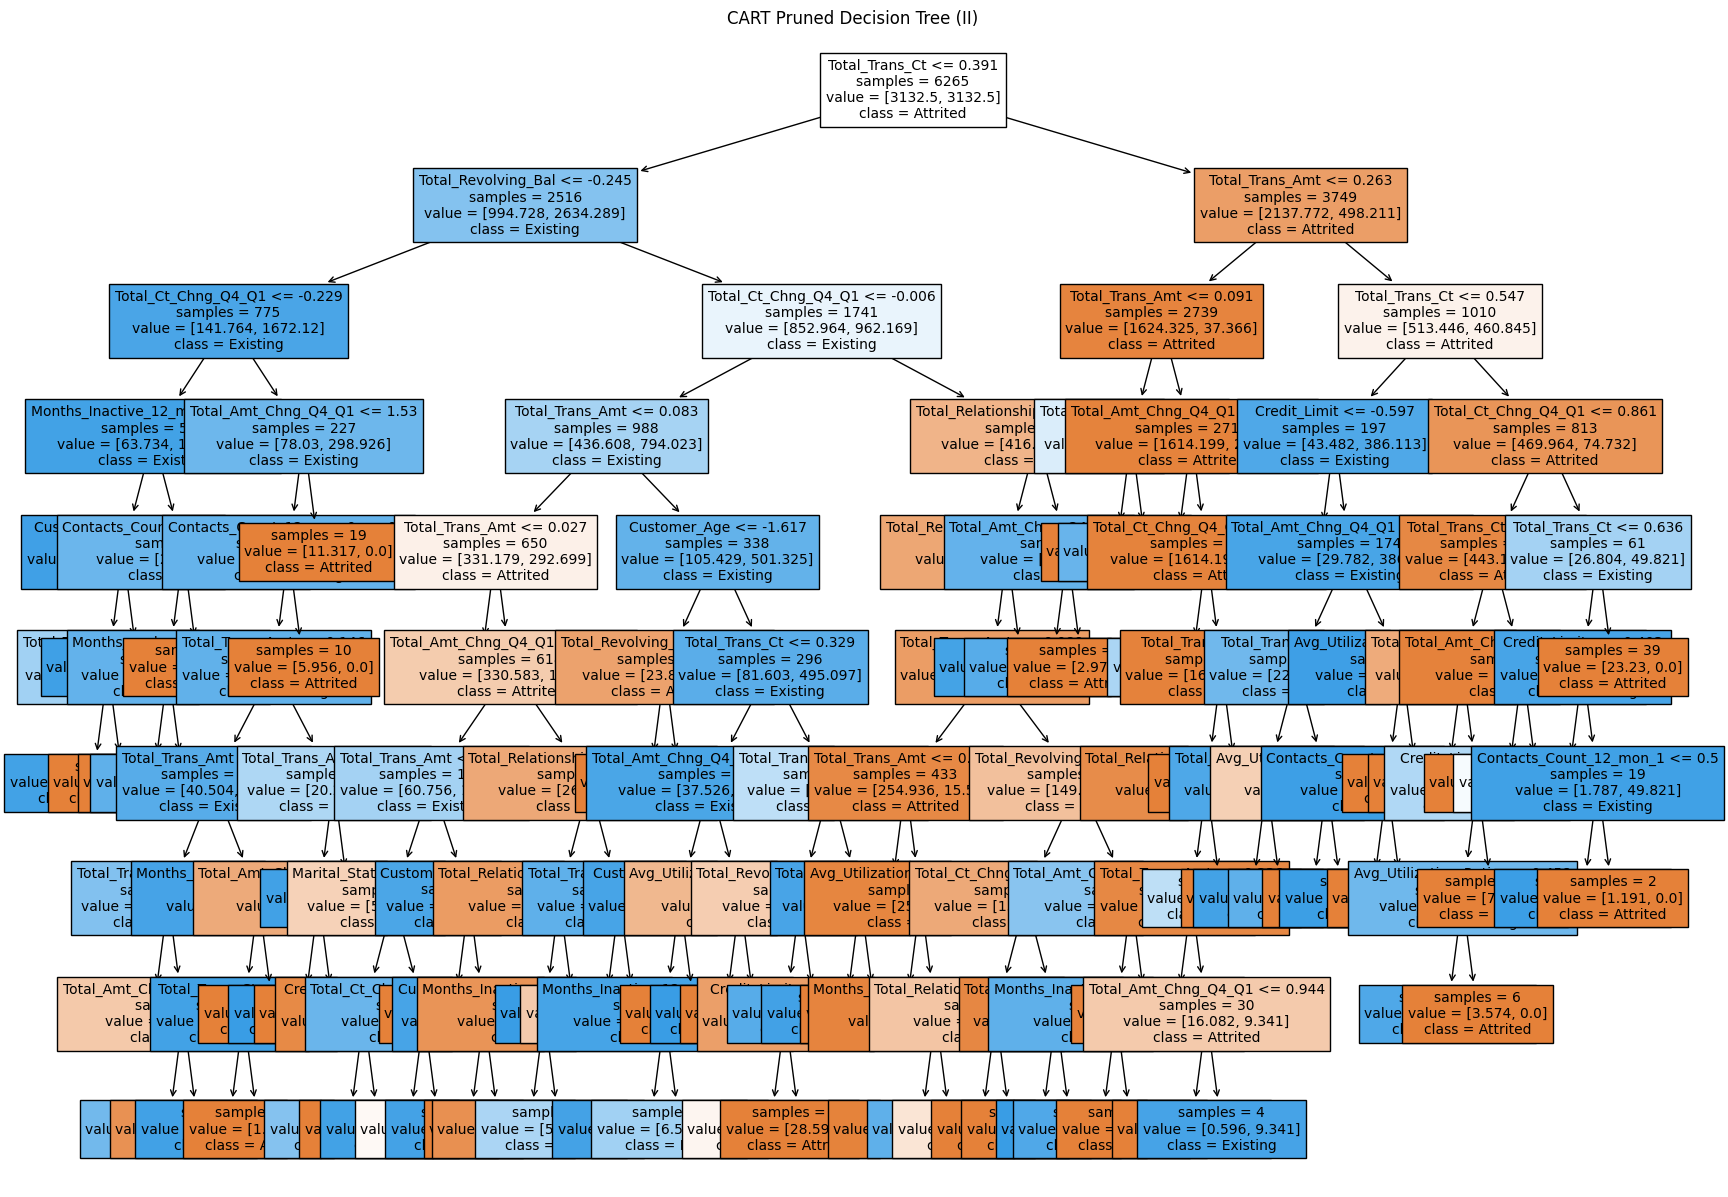

In [48]:
print(f"CART Pruned Decision Tree (II) Depth: {pruned_tree_II.get_depth()}")
print(f"Number of Leaves or Terminal Nodes: {pruned_tree_II.get_n_leaves()}")

# Set the size of the plot
fig, ax = plt.subplots(figsize=(20, 15))

# Plot the decision tree
plot = plot_tree(
    decision_tree = pruned_tree_II,  # Plotting the first tree in the forest
    feature_names = X_train.columns.tolist(),
    class_names = ['Attrited', 'Existing'],
    filled = True,
    impurity = False,
    fontsize = 10,
    ax = ax
)

# Add title and other customizations to match the style of your OOB error graph
ax.set_title("CART Pruned Decision Tree (II)", fontsize = 12)

# Show the plot
plt.show()

El árbol con mayor precisión es el primer podado `pruned_tree_I`, al presentar la mayor precisión en la matriz de confusión de test. Cabe mencionar que los árboles podados alcanzan una mejor precisión que el árbol sin podar.

## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 5.2. Classification Report </span>

In [49]:
importance_predictors = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importance': pruned_tree_I.feature_importances_}
                            )
print("---------------------------------------------------------------------")
print("Importance  of the Model Predictors - CART Pruned Decision Tree)")
print("---------------------------------------------------------------------")
importance_predictors.sort_values('importance', ascending = False).head(5)

---------------------------------------------------------------------
Importance  of the Model Predictors - CART Pruned Decision Tree)
---------------------------------------------------------------------


predictor  importance
49        Total_Trans_Ct    0.423564
48       Total_Trans_Amt    0.202192
50   Total_Revolving_Bal    0.112926
46   Total_Ct_Chng_Q4_Q1    0.072499
45  Total_Amt_Chng_Q4_Q1    0.051091

In [50]:
from sklearn.metrics import classification_report
print(
    classification_report(
        y_true = y_test,
        y_pred = pruned_tree_I.predict(X_test)
    )
)

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96      2254
         1.0       0.79      0.87      0.83       432

    accuracy                           0.94      2686
   macro avg       0.88      0.91      0.90      2686
weighted avg       0.94      0.94      0.94      2686



In [51]:
# Churn Classification using CART Pruned Decision Tree with various thresholds
cart_predictions = pd.DataFrame(data = pruned_tree_I.predict_proba(X = X_test), columns=['0', '1'])
cart_predictions['classification_default_0.5'] = np.where(cart_predictions['0'] > cart_predictions['1'], 0, 1)
cart_predictions['classification_custom_0.8'] = np.where(cart_predictions['1'] > 0.8, 1, 0)
cart_predictions['classification_custom_0.9'] = np.where(cart_predictions['1'] > 0.9, 1, 0)
cart_predictions.head(20)

0         1  classification_default_0.5  classification_custom_0.8  \
0   1.000000  0.000000                           0                          0   
1   1.000000  0.000000                           0                          0   
2   1.000000  0.000000                           0                          0   
3   0.986906  0.013094                           0                          0   
4   0.028167  0.971833                           1                          1   
5   1.000000  0.000000                           0                          0   
6   1.000000  0.000000                           0                          0   
7   1.000000  0.000000                           0                          0   
8   0.986906  0.013094                           0                          0   
9   0.007035  0.992965                           1                          1   
10  0.007035  0.992965                           1                          1   
11  1.000000  0.000000                           0                          0   
12  0.006133  0.993867                           1                          1   
13  1.000000  0.000000                           0                          0   
14  0.007035  0.992965                           1                          1   
15  1.000000  0.000000                           0                          0   
16  1.000000  0.000000                           0                          0   
17  0.986906  0.013094                           0                          0   
18  0.064428  0.935572                           1                          1   
19  0.040776  0.959224                           1                          1   

    classification_custom_0.9  
0                           0  
1                           0  
2                           0  
3                           0  
4                           1  
5                           0  
6                           0  
7                           0  
8                           0  
9                           1  
10                          1  
11                          0  
12                          1  
13                          0  
14                          1  
15                          0  
16                          0  
17                          0  
18                          1  
19                          1

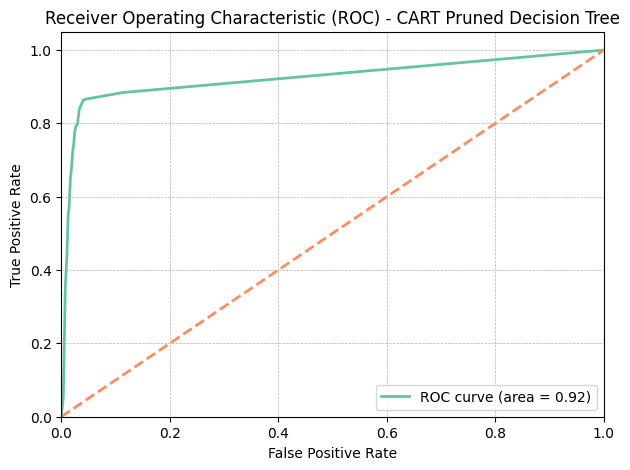

In [52]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, cart_predictions['1'])
roc_auc = auc(fpr, tpr)

# Set the palette and style of the plot to match the given example
sns.set_palette("Set2")

# Create the ROC curve plot with the same style
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax.plot([0, 1], [0, 1], lw=2, linestyle='--')

# Customize the plot to match the given style (titles, labels, legend, grid)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) - CART Pruned Decision Tree', fontsize = 12)
ax.legend(loc="lower right")

# Use the grid style and linewidth as in the example
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()


---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 6. Ensembles </span>

Random Forest y métodos de boosting como Gradient Boosting o AdaBoost son considerados buenos enfoques para tratar con datos desequilibrados debido a sus características inherentes.

## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 6.1. Random Forest</span>

En Random Forest se crea un conjunto de árboles de decisión, cada uno entrenado con una muestra aleatoria del conjunto de datos. Esto aumenta la diversidad entre los árboles, lo que a menudo conduce a un mejor rendimiento en clases minoritarias, ya que diferentes árboles podrían aprender diferentes aspectos de estas clases. 

Además, Random Forest permite el ajuste del peso de las clases, lo que puede ayudar a mejorar la detección de la clase minoritaria. Por tanto, al igual que antes, se maneja el desequilibrio de clases ajustando los pesos asignados a cada clase configurtando el parámetro `class_weight` con el valor `balanced`.

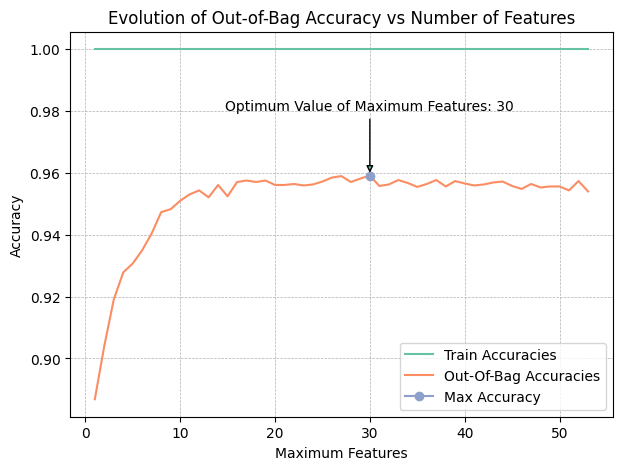

In [53]:
from sklearn.ensemble import RandomForestClassifier

# Defining number of features to use based on Out-of-Bag error
train_accuracies = []
oob_accuracies   = []

# Values to test for number of features
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Loop for training a model for each value in max_features. It is obtained training error
# and Out-of-Bag.
for max_features in max_features_range:
    model = RandomForestClassifier(
                n_estimators = 100,
                criterion    = 'entropy',  # or 'gini'
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                class_weight = 'balanced',
                random_state = 42
             )
    model.fit(X_train, y_train)
    train_accuracies.append(model.score(X_train, y_train))
    oob_accuracies.append(model.oob_score_)
    
# Graphic with the evolution of errors
sns.set_palette("Set2")

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(max_features_range, train_accuracies, label="Train Accuracies")
ax.plot(max_features_range, oob_accuracies, label="Out-Of-Bag Accuracies")
ax.plot(max_features_range[np.argmax(oob_accuracies)], max(oob_accuracies),
        marker='o', label="Max Accuracy")
ax.annotate(f"Optimum Value of Maximum Features: {max_features_range[np.argmax(oob_accuracies)]}",
            xy=(max_features_range[np.argmax(oob_accuracies)], max(oob_accuracies)),
            xytext=(max_features_range[np.argmax(oob_accuracies)], max(oob_accuracies)+0.021),
            arrowprops={'arrowstyle': '-|>'}, ha='center')
ax.set_ylabel("Accuracy")
ax.set_xlabel("Maximum Features")
ax.set_title("Evolution of Out-of-Bag Accuracy vs Number of Features", fontsize = 12)
plt.legend()
plt.grid(True, which = "both", ls = "--", linewidth = 0.5)

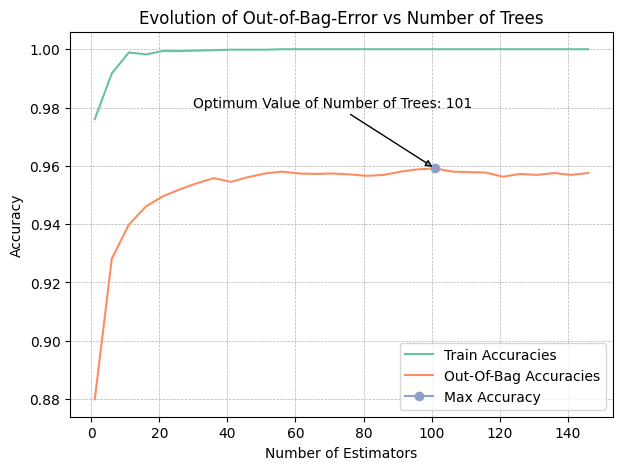

In [54]:
# Once  the number of features is known, the number of trees is found using Out-of-Bag error
train_accuracies = []
oob_accuracies   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# loop for training a model for each value in estimator_range 
# The training error and the Out-of-Bag are obtained.
for n_estimators in estimator_range:
    model = RandomForestClassifier(
                n_estimators = n_estimators,
                criterion    = 'entropy',
                max_depth    = None,
                max_features = 30,
                oob_score    = True,
                n_jobs       = -1,
                class_weight = 'balanced',
                random_state = 42
             )
    model.fit(X_train, y_train)
    train_accuracies.append(model.score(X_train, y_train))
    oob_accuracies.append(model.oob_score_)
    
# Graphic with the evolution of errors
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(estimator_range, train_accuracies, label="Train Accuracies")
ax.plot(estimator_range, oob_accuracies, label="Out-Of-Bag Accuracies")
ax.plot(estimator_range[np.argmax(oob_accuracies)], max(oob_accuracies),
        marker='o', label="Max Accuracy")
ax.annotate(f"Optimum Value of Number of Trees: {estimator_range[np.argmax(oob_accuracies)]}",
            xy=(estimator_range[np.argmax(oob_accuracies)], max(oob_accuracies)),
            xytext=(estimator_range[np.argmax(oob_accuracies)]-30, max(oob_accuracies)+0.021),
            arrowprops={'arrowstyle': '-|>'}, ha = 'center')
ax.set_ylabel("Accuracy")
ax.set_xlabel("Number of Estimators")
ax.set_title("Evolution of Out-of-Bag-Error vs Number of Trees", fontsize = 12)
plt.legend()
plt.grid(True, which = "both", ls = "--", linewidth = 0.5)

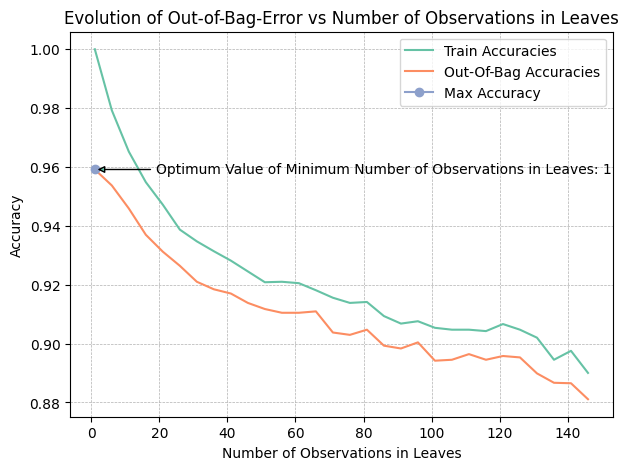

In [55]:
# Fitting the minimum number of observations in the leeaves of the trees using Out-of-Bag error
train_accuracies = []
oob_accuracies   = []

# Valores evaluados
obser_range = range(1, 150, 5)

# loop for training a model for each value in estimator_range 
# The training error and the Out-of-Bag are obtained.
for observ in obser_range:
    model = RandomForestClassifier(
                n_estimators = 101,
                criterion    = 'entropy',
                max_depth    = None,
                max_features = 30,
                min_samples_leaf = observ,
                oob_score    = True,
                n_jobs       = -1,
                class_weight = 'balanced',
                random_state = 42
             )
    model.fit(X_train, y_train)
    train_accuracies.append(model.score(X_train, y_train))
    oob_accuracies.append(model.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(obser_range, train_accuracies, label="Train Accuracies")
ax.plot(obser_range, oob_accuracies, label="Out-Of-Bag Accuracies")
ax.plot(obser_range[np.argmax(oob_accuracies)], max(oob_accuracies),
        marker='o', label="Max Accuracy")
ax.annotate(f"Optimum Value of Minimum Number of Observations in Leaves: {obser_range[np.argmax(oob_accuracies)]}",
            xy=(obser_range[np.argmax(oob_accuracies)], max(oob_accuracies)),
            xytext=(obser_range[np.argmax(oob_accuracies)]+18, max(oob_accuracies)),
            arrowprops={'arrowstyle': '-|>'}, va='center')            
ax.set_ylabel("Accuracy")
ax.set_xlabel("Number of Observations in Leaves")
ax.set_title("Evolution of Out-of-Bag-Error vs Number of Observations in Leaves", fontsize = 12)
plt.legend()
plt.grid(True, which = "both", ls = "--", linewidth = 0.5)

In [60]:
# Model creation
rf_model = RandomForestClassifier(
            n_estimators = 101,  # number of trees
            criterion    = 'entropy',
            max_depth    = None,
            max_features = 30,
            min_samples_leaf = 1,
            oob_score    = True,
            n_jobs       = -1,
            class_weight = 'balanced',
            random_state = 42
         )

# Training Random Forest
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features=30, n_estimators=101, n_jobs=-1,
                       oob_score=True, random_state=42)

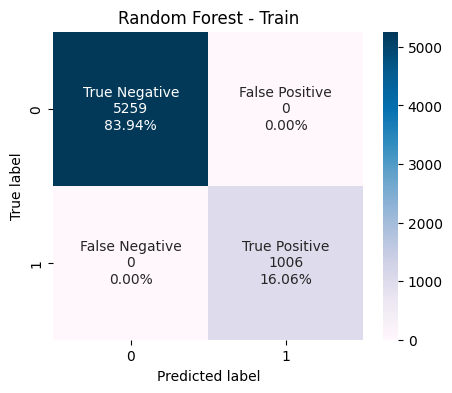

In [61]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train, rf_model.predict(X_train), labels=rf_model.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('Random Forest - Train', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()


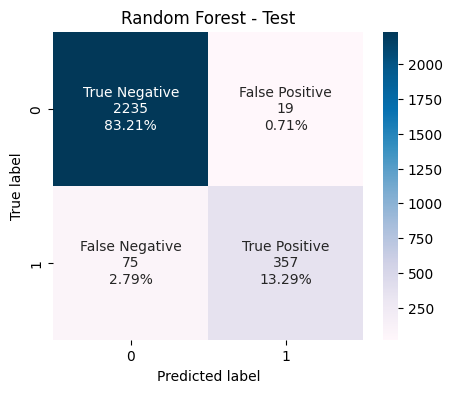

In [62]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, rf_model.predict(X_test), labels=rf_model.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('Random Forest - Test', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

In [63]:
# Grid to find hiperparameters
from sklearn.model_selection import ParameterGrid

param_grid = ParameterGrid(
                {'n_estimators': [20, 25, 50, 100, 150],
                'max_features': [5, 10, 15, 20, 25],
                'max_depth'   : [1, 5, 10, 15, 20],
                'criterion'   : ['gini', 'entropy']
                }
            )

results = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    model = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                class_weight = 'balanced',
                random_state = 42,
                ** params
             )
    
    model.fit(X_train, y_train)
    
    results['params'].append(params)
    results['oob_accuracy'].append(model.oob_score_)

# Results
results = pd.DataFrame(results)
results = pd.concat([results, results['params'].apply(pd.Series)], axis=1)
results = results.sort_values('oob_accuracy', ascending=False)
results = results.drop(columns = 'params')
results.head(10)

oob_accuracy criterion  max_depth  max_features  n_estimators
248      0.958021   entropy         20            25           100
213      0.958021   entropy         15            15           100
219      0.957542   entropy         15            20           150
224      0.957382   entropy         15            25           150
223      0.957382   entropy         15            25           100
249      0.957063   entropy         20            25           150
199      0.956903   entropy         10            25           150
218      0.956744   entropy         15            20           100
214      0.956744   entropy         15            15           150
244      0.956584   entropy         20            20           150

In [64]:
# Better hyperparameters using out-of-bag error
print("---------------------------------------------------------------------")
print("Better Hyperparameters Found - Random Forest (OOB - Accuracy)")
print("---------------------------------------------------------------------")
print(results.iloc[0,0], ":", results.iloc[0,:]['oob_accuracy'], "accuracy")

---------------------------------------------------------------------
Better Hyperparameters Found - Random Forest (OOB - Accuracy)
---------------------------------------------------------------------
0.9580207501995212 : 0.9580207501995212 accuracy


In [65]:
# Model creation
rf_best_oob = RandomForestClassifier(
            n_estimators = 100,  # number of trees
            criterion    = 'entropy',
            max_depth    = 20,
            max_features = 25,
            oob_score    = True,
            n_jobs       = -1,
            class_weight = 'balanced',
            random_state = 42
         )

# Training Random Forest
rf_best_oob.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, max_features=25, n_jobs=-1, oob_score=True,
                       random_state=42)

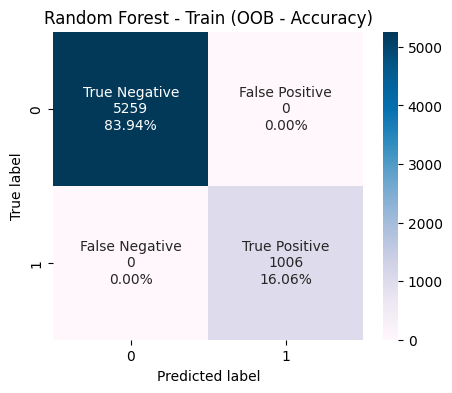

In [66]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train, rf_best_oob.predict(X_train), labels=rf_best_oob.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('Random Forest - Train (OOB - Accuracy)', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

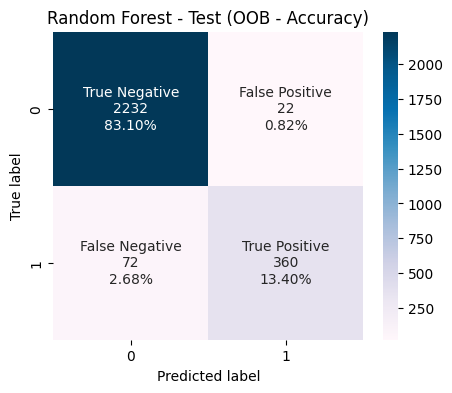

In [67]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, rf_best_oob.predict(X_test), labels=rf_best_oob.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('Random Forest - Test (OOB - Accuracy)', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

In [68]:
from sklearn.model_selection import RepeatedKFold

# Grid search based on cross-validation
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [20, 25, 50, 100, 150],
              'max_features': [5, 10, 15, 20, 25],
              'max_depth'   : [1, 5, 10, 15, 20],
              'criterion'   : ['gini', 'entropy']
             }

# Grid search by CV
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 42, class_weight = 'balanced'),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 42), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
results_cv = pd.DataFrame(grid.cv_results_)
results_cv.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

param_criterion param_max_depth param_max_features param_n_estimators  \
249         entropy              20                 25                150   
223         entropy              15                 25                100   
224         entropy              15                 25                150   
244         entropy              20                 20                150   

     mean_test_score  std_test_score  mean_train_score  std_train_score  
249         0.956797        0.005687          1.000000           0.0000  
223         0.956637        0.004977          0.999973           0.0001  
224         0.956318        0.005060          1.000000           0.0000  
244         0.956159        0.006308          1.000000           0.0000

In [69]:
# Better hyperparameters using cv and out-of-bag error
print("---------------------------------------------------------------------")
print("Better Hyperparameters Found - Random Forest (Cross - Validation)")
print("---------------------------------------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

---------------------------------------------------------------------
Better Hyperparameters Found - Random Forest (Cross - Validation)
---------------------------------------------------------------------
{'criterion': 'entropy', 'max_depth': 20, 'max_features': 25, 'n_estimators': 150} : 0.9567970204841711 accuracy


In [71]:
# Model creation
rf_cv = RandomForestClassifier(
            n_estimators = 150,  # number of trees
            criterion    = 'entropy',
            max_depth    = 20,
            max_features = 25,
            oob_score    = True,
            n_jobs       = -1,
            class_weight = 'balanced',
            random_state = 42
         )

# Training Random Forest
rf_cv.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, max_features=25, n_estimators=150,
                       n_jobs=-1, oob_score=True, random_state=42)

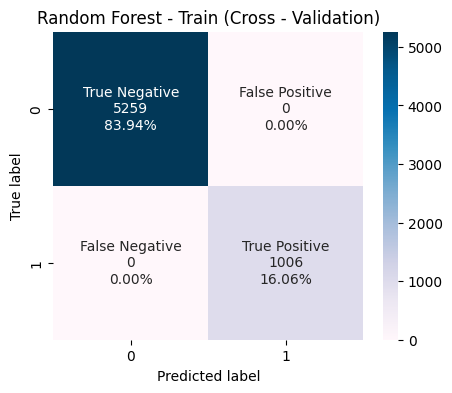

In [72]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train, rf_cv.predict(X_train), labels=rf_cv.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('Random Forest - Train (Cross - Validation)', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

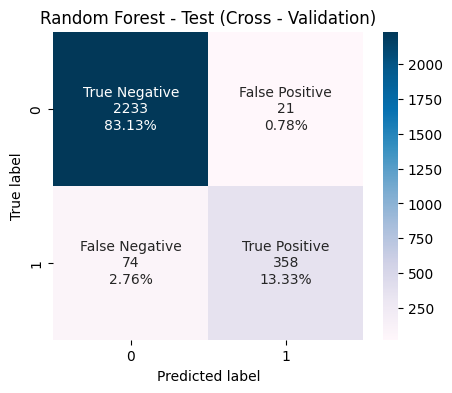

In [73]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, rf_cv.predict(X_test), labels=rf_cv.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('Random Forest - Test (Cross - Validation)', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

El mejor modelo alcanzado es `rf_model`, al presentar la mayor precisión en la matriz de confusión de test. No obstante, todos los Random Forest tienen precisiones muy similares. El modelo usado para buscar hiperparámetros con Grid Validation es quizás el mas descaconsejable por su elevado tiempo de búsqueda con respecto a los otros dos.

## <span style="font-family: Latin Modern Roman; font-size: 21px;"> 6.1.1. Classification Report </span>

In [74]:
importance_predictors = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importance': rf_model.feature_importances_}
                            )
print("---------------------------------------------------------------------")
print("Importance  of the Model Predictors - Random Forest")
print("---------------------------------------------------------------------")
importance_predictors.sort_values('importance', ascending = False).head(5)

---------------------------------------------------------------------
Importance  of the Model Predictors - Random Forest
---------------------------------------------------------------------


predictor  importance
49        Total_Trans_Ct    0.274510
48       Total_Trans_Amt    0.249096
50   Total_Revolving_Bal    0.117485
46   Total_Ct_Chng_Q4_Q1    0.076566
45  Total_Amt_Chng_Q4_Q1    0.067463

In [75]:
print(
    classification_report(
        y_true = y_test,
        y_pred = rf_model.predict(X_test)
    )
)

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2254
         1.0       0.95      0.83      0.88       432

    accuracy                           0.97      2686
   macro avg       0.96      0.91      0.93      2686
weighted avg       0.96      0.97      0.96      2686



In [76]:
# Churn Classification using Random Forest with various thresholds
rf_predictions = pd.DataFrame(data = rf_model.predict_proba(X = X_test), columns=['0', '1'])
rf_predictions['classification_default_0.5'] = np.where(rf_predictions['0'] > rf_predictions['1'], 0, 1)
rf_predictions['classification_custom_0.8'] = np.where(rf_predictions['1'] > 0.8, 1, 0)
rf_predictions['classification_custom_0.9'] = np.where(rf_predictions['1'] > 0.9, 1, 0)
rf_predictions.head(20)

0         1  classification_default_0.5  classification_custom_0.8  \
0   1.000000  0.000000                           0                          0   
1   1.000000  0.000000                           0                          0   
2   1.000000  0.000000                           0                          0   
3   1.000000  0.000000                           0                          0   
4   0.386139  0.613861                           1                          0   
5   1.000000  0.000000                           0                          0   
6   1.000000  0.000000                           0                          0   
7   1.000000  0.000000                           0                          0   
8   0.990099  0.009901                           0                          0   
9   0.009901  0.990099                           1                          1   
10  0.158416  0.841584                           1                          1   
11  1.000000  0.000000                           0                          0   
12  0.277228  0.722772                           1                          0   
13  0.970297  0.029703                           0                          0   
14  0.148515  0.851485                           1                          1   
15  0.970297  0.029703                           0                          0   
16  0.990099  0.009901                           0                          0   
17  0.950495  0.049505                           0                          0   
18  0.504950  0.495050                           0                          0   
19  0.712871  0.287129                           0                          0   

    classification_custom_0.9  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  
5                           0  
6                           0  
7                           0  
8                           0  
9                           1  
10                          0  
11                          0  
12                          0  
13                          0  
14                          0  
15                          0  
16                          0  
17                          0  
18                          0  
19                          0

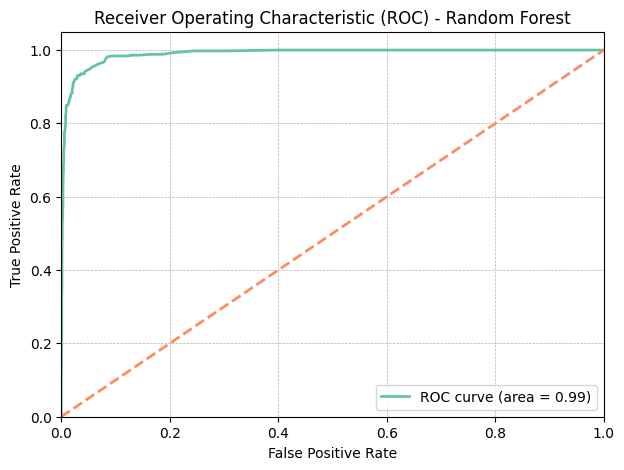

In [77]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_predictions['1'])
roc_auc = auc(fpr, tpr)

# Set the palette and style of the plot to match the given example
sns.set_palette("Set2")

# Create the ROC curve plot with the same style
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax.plot([0, 1], [0, 1], lw=2, linestyle='--')

# Customize the plot to match the given style (titles, labels, legend, grid)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) - Random Forest', fontsize = 12)
ax.legend(loc="lower right")

# Use the grid style and linewidth as in the example
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()

## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 6.2. Boosting</span>

Por otro lado, los métodos de boosting se centran en mejorar iterativamente la precisión de un modelo, poniendo especial atención en las instancias que fueron clasificadas erróneamente en iteraciones anteriores. Esto significa que, si las instancias de la clase minoritaria son las que comúnmente se clasifican de forma incorrecta, el modelo incrementará progresivamente su enfoque en estas, mejorando así su detección.

In [146]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils import class_weight
import multiprocessing

# Grid to find hiperparameters
param_grid = {'n_estimators'  : [50, 100, 500, 1000],
              'max_features'  : [None, 'sqrt', 'log2'],
              'max_depth'     : [None, 1, 3, 5, 10, 20],
              'subsample'     : [0.5, 1], 
              'learning_rate' : [0.001, 0.01, 0.1]
             }

# Grid search using CV
grid = GridSearchCV(
        estimator  = GradientBoostingClassifier(random_state = 42),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 3, n_repeats = 1, random_state = 42), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

weights = class_weight.compute_sample_weight(class_weight = 'balanced', y = y_train)
grid.fit(X_train, y_train, sample_weight = weights)

GridSearchCV(cv=RepeatedKFold(n_repeats=1, n_splits=3, random_state=42),
             estimator=GradientBoostingClassifier(random_state=42), n_jobs=9,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [None, 1, 3, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 500, 1000],
                         'subsample': [0.5, 1]},
             return_train_score=True, scoring='accuracy')

In [147]:
# Results
results = pd.DataFrame(grid.cv_results_)
results.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

param_learning_rate param_max_depth param_max_features param_n_estimators  \
366                 0.1               5               None               1000   
342                 0.1               3               None               1000   
364                 0.1               5               None                500   
374                 0.1               5               sqrt               1000   
390                 0.1              10               None               1000   
340                 0.1               3               None                500   
388                 0.1              10               None                500   
343                 0.1               3               None               1000   
375                 0.1               5               sqrt               1000   
351                 0.1               3               sqrt               1000   

    param_subsample  mean_test_score  std_test_score  mean_train_score  \
366             0.5         0.967119        0.006111          1.000000   
342             0.5         0.966800        0.003418          1.000000   
364             0.5         0.966321        0.005280          1.000000   
374             0.5         0.965842        0.003914          1.000000   
390             0.5         0.965044        0.004079          1.000000   
340             0.5         0.965043        0.003347          0.998324   
388             0.5         0.964565        0.004510          1.000000   
343               1         0.964565        0.004232          1.000000   
375               1         0.964405        0.003916          1.000000   
351               1         0.964246        0.002605          0.999840   

     std_train_score  
366         0.000000  
342         0.000000  
364         0.000000  
374         0.000000  
390         0.000000  
340         0.000195  
388         0.000000  
343         0.000000  
375         0.000000  
351         0.000113

In [148]:
# Better hyperparameters using out-of-bag error
print("---------------------------------------------------------------------")
print("Better Hyperparameters Found - Gradient Boosting (OOB - Accuracy)")
print("---------------------------------------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

---------------------------------------------------------------------
Better Hyperparameters Found - Gradient Boosting (OOB - Accuracy)
---------------------------------------------------------------------
{'learning_rate': 0.1, 'max_depth': 5, 'max_features': None, 'n_estimators': 1000, 'subsample': 0.5} : 0.9671190912442295 accuracy


In [149]:
gbc_model = grid.best_estimator_

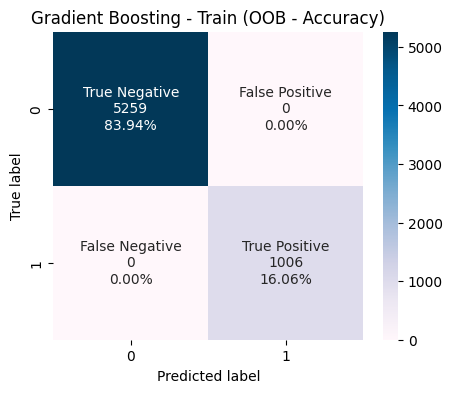

In [150]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train, gbc_model.predict(X_train), labels=gbc_model.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('Gradient Boosting - Train (OOB - Accuracy)', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

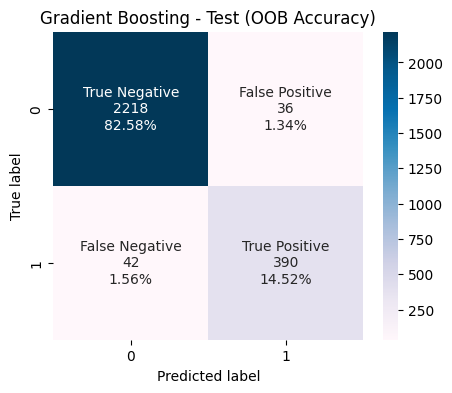

In [151]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, gbc_model.predict(X_test), labels=gbc_model.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('Gradient Boosting - Test (OOB Accuracy)', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

In [152]:
import xgboost as xgb

positive_instances = sum(y_train == 1)
negative_instances = sum(y_train == 0)
ratio = negative_instances / positive_instances

clf = xgb.XGBClassifier(
    objective = 'binary:logistic',
    scale_pos_weight = negative_instances/positive_instances
)
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
     "n_estimators"     : [10, 20, 30]
    }

grid = GridSearchCV(clf, parameters, n_jobs = 4, cv = 3)
grid.fit(X = X_train, y = y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=4,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'eta': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'min_child_weight': [1, 3, 5, 7],
                         'n_estimators': [10, 20, 30]})

In [153]:
# Results
results = pd.DataFrame(grid.cv_results_)
results.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

param_colsample_bytree param_eta param_gamma param_max_depth  \
10613                    0.7      0.25         0.0               8   
11108                    0.7       0.3         0.0              10   
11270                    0.7       0.3         0.2               6   
5561                     0.4       0.3         0.2              15   
11228                    0.7       0.3         0.1              15   
11078                    0.7       0.3         0.0               6   
10829                    0.7      0.25         0.2              12   
10808                    0.7      0.25         0.2               8   
4877                     0.4      0.25         0.0              12   
11366                    0.7       0.3         0.3               6   

      param_min_child_weight param_n_estimators  mean_test_score  \
10613                      3                 30         0.965682   
11108                      5                 30         0.964883   
11270                      1                 30         0.964724   
5561                       3                 30         0.964564   
11228                      5                 30         0.964405   
11078                      1                 30         0.964245   
10829                      3                 30         0.964086   
10808                      5                 30         0.964086   
4877                       3                 30         0.963767   
11366                      1                 30         0.963767   

       std_test_score  
10613        0.001770  
11108        0.004020  
11270        0.002941  
5561         0.002959  
11228        0.001633  
11078        0.002160  
10829        0.001180  
10808        0.002713  
4877         0.000596  
11366        0.000820

In [154]:
# Best hiperparameters using CV
print("---------------------------------------------------------------------")
print("Better Hyperparameters Found - XGBoosting (Cross - Validation)")
print("---------------------------------------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

---------------------------------------------------------------------
Better Hyperparameters Found - XGBoosting (Cross - Validation)
---------------------------------------------------------------------
{'colsample_bytree': 0.7, 'eta': 0.25, 'gamma': 0.0, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 30} : 0.965682003953079 None


In [155]:
n_trees_included = len(grid.best_estimator_.get_booster().get_dump())
print(f"Number of Trees Included in the Model: {n_trees_included}")

Number of Trees Included in the Model: 30


In [156]:
xgb_model = grid.best_estimator_

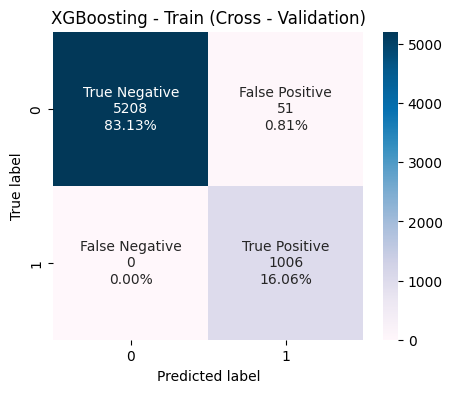

In [157]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train, xgb_model.predict(X_train), labels=xgb_model.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('XGBoosting - Train (Cross - Validation)', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

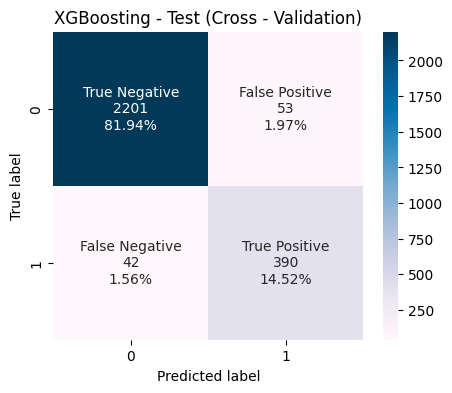

In [158]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, xgb_model.predict(X_test), labels=xgb_model.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('XGBoosting - Test (Cross - Validation)', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

El mejor modelo alcanzado es `gbc_model`, al presentar la mayor precisión en la matriz de confusión de test.

## <span style="font-family: Latin Modern Roman; font-size: 21px;"> 6.2.1. Classification Report </span>

In [159]:
importance_predictors = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importance': gbc_model.feature_importances_}
                            )
print("---------------------------------------------------------------------")
print("Importance  of the Model Predictors - Gradient Boosting")
print("---------------------------------------------------------------------")
importance_predictors.sort_values('importance', ascending = False).head(5)

---------------------------------------------------------------------
Importance  of the Model Predictors - Gradient Boosting
---------------------------------------------------------------------


predictor  importance
49        Total_Trans_Ct    0.378759
48       Total_Trans_Amt    0.219411
50   Total_Revolving_Bal    0.111664
46   Total_Ct_Chng_Q4_Q1    0.076717
45  Total_Amt_Chng_Q4_Q1    0.061662

In [160]:
print(
    classification_report(
        y_true = y_test,
        y_pred = gbc_model.predict(X_test)
    )
)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2254
         1.0       0.92      0.90      0.91       432

    accuracy                           0.97      2686
   macro avg       0.95      0.94      0.95      2686
weighted avg       0.97      0.97      0.97      2686



In [161]:
# Churn Classification using Boosting with various thresholds
gbc_predictions = pd.DataFrame(data = gbc_model.predict_proba(X = X_test), columns=['0', '1'])
gbc_predictions['classification_default_0.5'] = np.where(gbc_predictions['0'] > gbc_predictions['1'], 0, 1)
gbc_predictions['classification_custom_0.8'] = np.where(gbc_predictions['1'] > 0.8, 1, 0)
gbc_predictions['classification_custom_0.9'] = np.where(gbc_predictions['1'] > 0.9, 1, 0)
gbc_predictions.head(20)

0             1  classification_default_0.5  \
0   1.000000  8.678194e-08                           0   
1   1.000000  2.206734e-09                           0   
2   1.000000  2.853156e-07                           0   
3   1.000000  9.449986e-09                           0   
4   0.020947  9.790533e-01                           1   
5   1.000000  1.933829e-08                           0   
6   0.999999  5.803803e-07                           0   
7   1.000000  7.454592e-08                           0   
8   0.999987  1.285533e-05                           0   
9   0.000002  9.999984e-01                           1   
10  0.394717  6.052830e-01                           1   
11  1.000000  1.032055e-08                           0   
12  0.000064  9.999361e-01                           1   
13  0.999985  1.488801e-05                           0   
14  0.000698  9.993019e-01                           1   
15  0.999958  4.234722e-05                           0   
16  0.999998  1.666100e-06                           0   
17  0.998113  1.887379e-03                           0   
18  0.014092  9.859082e-01                           1   
19  0.996529  3.470888e-03                           0   

    classification_custom_0.8  classification_custom_0.9  
0                           0                          0  
1                           0                          0  
2                           0                          0  
3                           0                          0  
4                           1                          1  
5                           0                          0  
6                           0                          0  
7                           0                          0  
8                           0                          0  
9                           1                          1  
10                          0                          0  
11                          0                          0  
12                          1                          1  
13                          0                          0  
14                          1                          1  
15                          0                          0  
16                          0                          0  
17                          0                          0  
18                          1                          1  
19                          0                          0

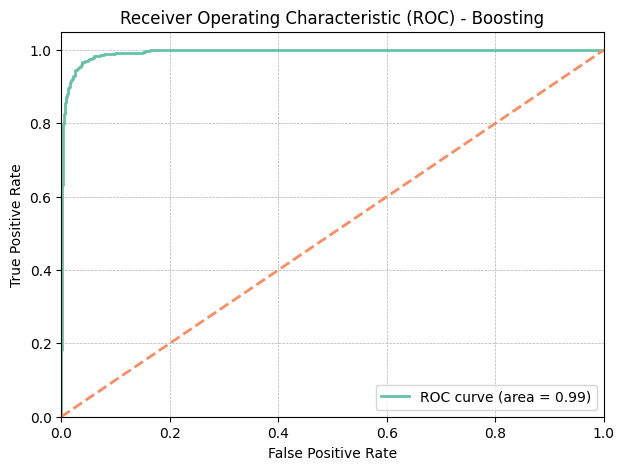

In [162]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gbc_predictions['1'])
roc_auc = auc(fpr, tpr)

# Set the palette and style of the plot to match the given example
sns.set_palette("Set2")

# Create the ROC curve plot with the same style
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax.plot([0, 1], [0, 1], lw=2, linestyle='--')

# Customize the plot to match the given style (titles, labels, legend, grid)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) - Boosting', fontsize = 12)
ax.legend(loc="lower right")

# Use the grid style and linewidth as in the example
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 7. Clustering </span>

## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 7.1. Number of Clusters</span>

In [132]:
from sklearn.cluster import KMeans
Ks = range(2, 12)
# inertia = distorsion
kmeans_per_k = [KMeans(n_clusters = k, n_init = 10, random_state = 42).fit(df_scaled) for k in Ks]
inertias = [model.inertia_ for model in kmeans_per_k]

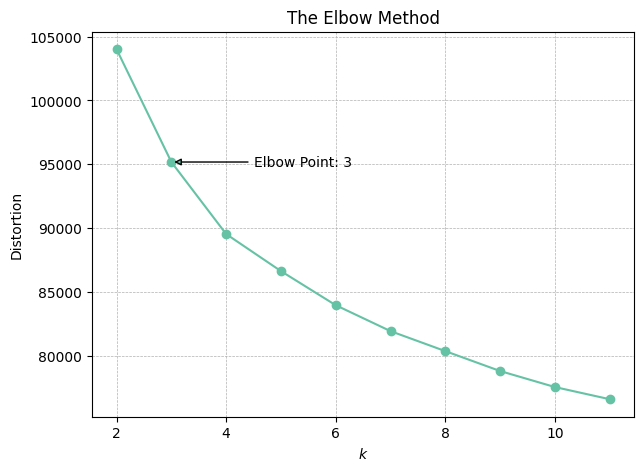

In [133]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(Ks, inertias, "o-")
ax.set_xlabel("$k$")
ax.set_ylabel("Distortion")
ax.set_title("The Elbow Method", fontsize = 12)

elbow_point = 3
elbow_inertia = inertias[elbow_point - 2]
ax.annotate('Elbow Point: {}'.format(elbow_point),
            xy=(elbow_point, elbow_inertia),
            xytext=(elbow_point+1.5, elbow_inertia),
            arrowprops={'arrowstyle': '-|>'}, va='center') 

plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

<div style="text-align: justify;">

El **Método del codo** utiliza el cambio de pendiente para indicar un número potencialmente interesante de grupos. En este caso parece haber un cambio de pendiente entre 3 y 4 clusters.
</div>

In [134]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(df_scaled, model.labels_) for model in kmeans_per_k]
best_index = silhouette_scores.index(max(silhouette_scores))
best_k = Ks[best_index]

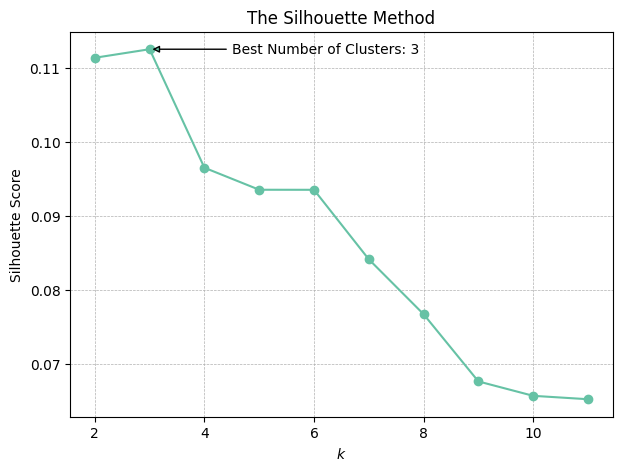

In [135]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(Ks, silhouette_scores, "o-")
ax.set_xlabel("$k$")
ax.set_ylabel("Silhouette Score")
ax.set_title("The Silhouette Method", fontsize = 12)
ax.annotate('Best Number of Clusters: {}'.format(best_k),
            xy=(best_k, silhouette_scores[best_index]),
            xytext=(best_k+1.5, silhouette_scores[best_index]),
            arrowprops={'arrowstyle': '-|>'}, va='center') 

plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

<div style="text-align: justify;">

El **Método de la Silueta** mide qué tan similar es un punto a su propio grupo en comparación con otros grupos y calcula un coeficiente. Cuanto mayor sea el coeficiente final, más óptimo será el número de conglomerados. Los coeficientes más altos para el caso se alcanzan en 3 clusters nuevamente.
</div>

## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 7.2. Principal Component Analysis (PCA)</span>

<div style="text-align: justify;">

El número de clusters idóneo es equivalente a 3. Sin embargo, la clase a predecir tiene 2 valores, si el cliente sigue manteniendo la tarjeta de crédito o no, siendo una salida binaria. Se hace un análisis para ver las características y la distribución de los clientes en los clusters fijados.

Por otra parte, dada el gran número de columnas y la alta dimensionalidad del dataset, se aplica PCA para reducir el número de dimensiones a 2, con el objetivo de visualizar la distribución de los clusters en gráficos 2D.

</div>

In [136]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components = 2)
df_scaled_pca = pca.fit_transform(df_scaled)


In [137]:
# Get the PCA components
loadings = pca.components_

# Get the feature names
feature_names = df_scaled.columns

# Absolute loadings in a DataFrame
loading_matrix = pd.DataFrame(loadings, columns=feature_names, index=['PC1', 'PC2'])

# Show the 5 features that contribute most to each component
top_contributors_pc1 = loading_matrix.loc['PC1'].abs().sort_values(ascending=False).head(5)
top_contributors_pc2 = loading_matrix.loc['PC2'].abs().sort_values(ascending=False).head(5)

print("Top contributing features to PC1:")
print(top_contributors_pc1)
print("\nTop contributing features to PC2:")
print(top_contributors_pc2)

Top contributing features to PC1:
Avg_Utilization_Ratio    0.665605
Total_Revolving_Bal      0.482333
Credit_Limit             0.396814
Total_Ct_Chng_Q4_Q1      0.198221
Gender_F                 0.151802
Name: PC1, dtype: float64

Top contributing features to PC2:
Customer_Age             0.684543
Months_on_book           0.681183
Total_Amt_Chng_Q4_Q1     0.156347
Avg_Utilization_Ratio    0.110492
Total_Ct_Chng_Q4_Q1      0.101681
Name: PC2, dtype: float64


## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 7.3. Clustering Distribution</span>

<div style="text-align: justify;">

La agrupación aglomerativa, a diferencia de KMeans, puede manejar grupos no esféricos y de diferentes tamaños. Proporciona una jerarquía de grupos, que puede ser útil para análisis posteriores
</div>

In [138]:
from sklearn.cluster import AgglomerativeClustering

linkages = ['single', 'complete', 'average', 'ward']
cluster_counts = {}

for linkage in linkages:
    clustering_model = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    clustering_model.fit(df_scaled_pca)
    clusters = clustering_model.labels_
    cluster_counts[linkage] = pd.Series(clusters).value_counts().sort_index()

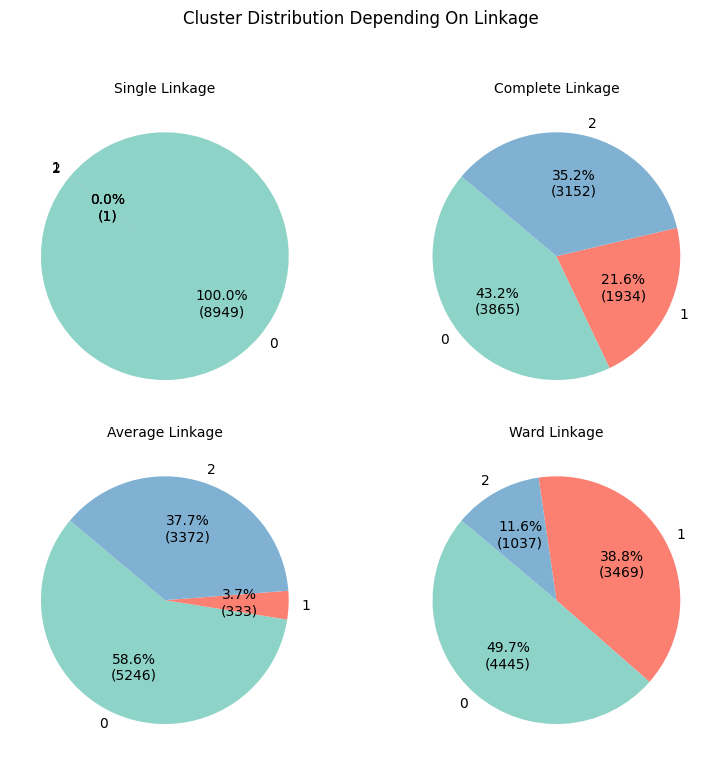

In [139]:
# Set up the figure for pie charts
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle('Cluster Distribution Depending On Linkage', fontsize = 12)

original_palette = sns.color_palette("Set3")
custom_order = [0, 3, 4]
cluster_palette = [original_palette[i] for i in custom_order]

for i, linkage in enumerate(linkages):
    row, col = divmod(i, 2)
    cluster_count = cluster_counts[linkage]

    def custom_autopct(pct):
        total = sum(cluster_count)
        val = int(round(pct*total/100.0))
        return f"{pct:.1f}%\n({val:d})"
    
    axes[row, col].pie(cluster_count, labels = cluster_count.index, autopct = custom_autopct, colors = cluster_palette, startangle = 140)
    axes[row, col].set_title(f'{linkage.capitalize()} Linkage', fontsize = 10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

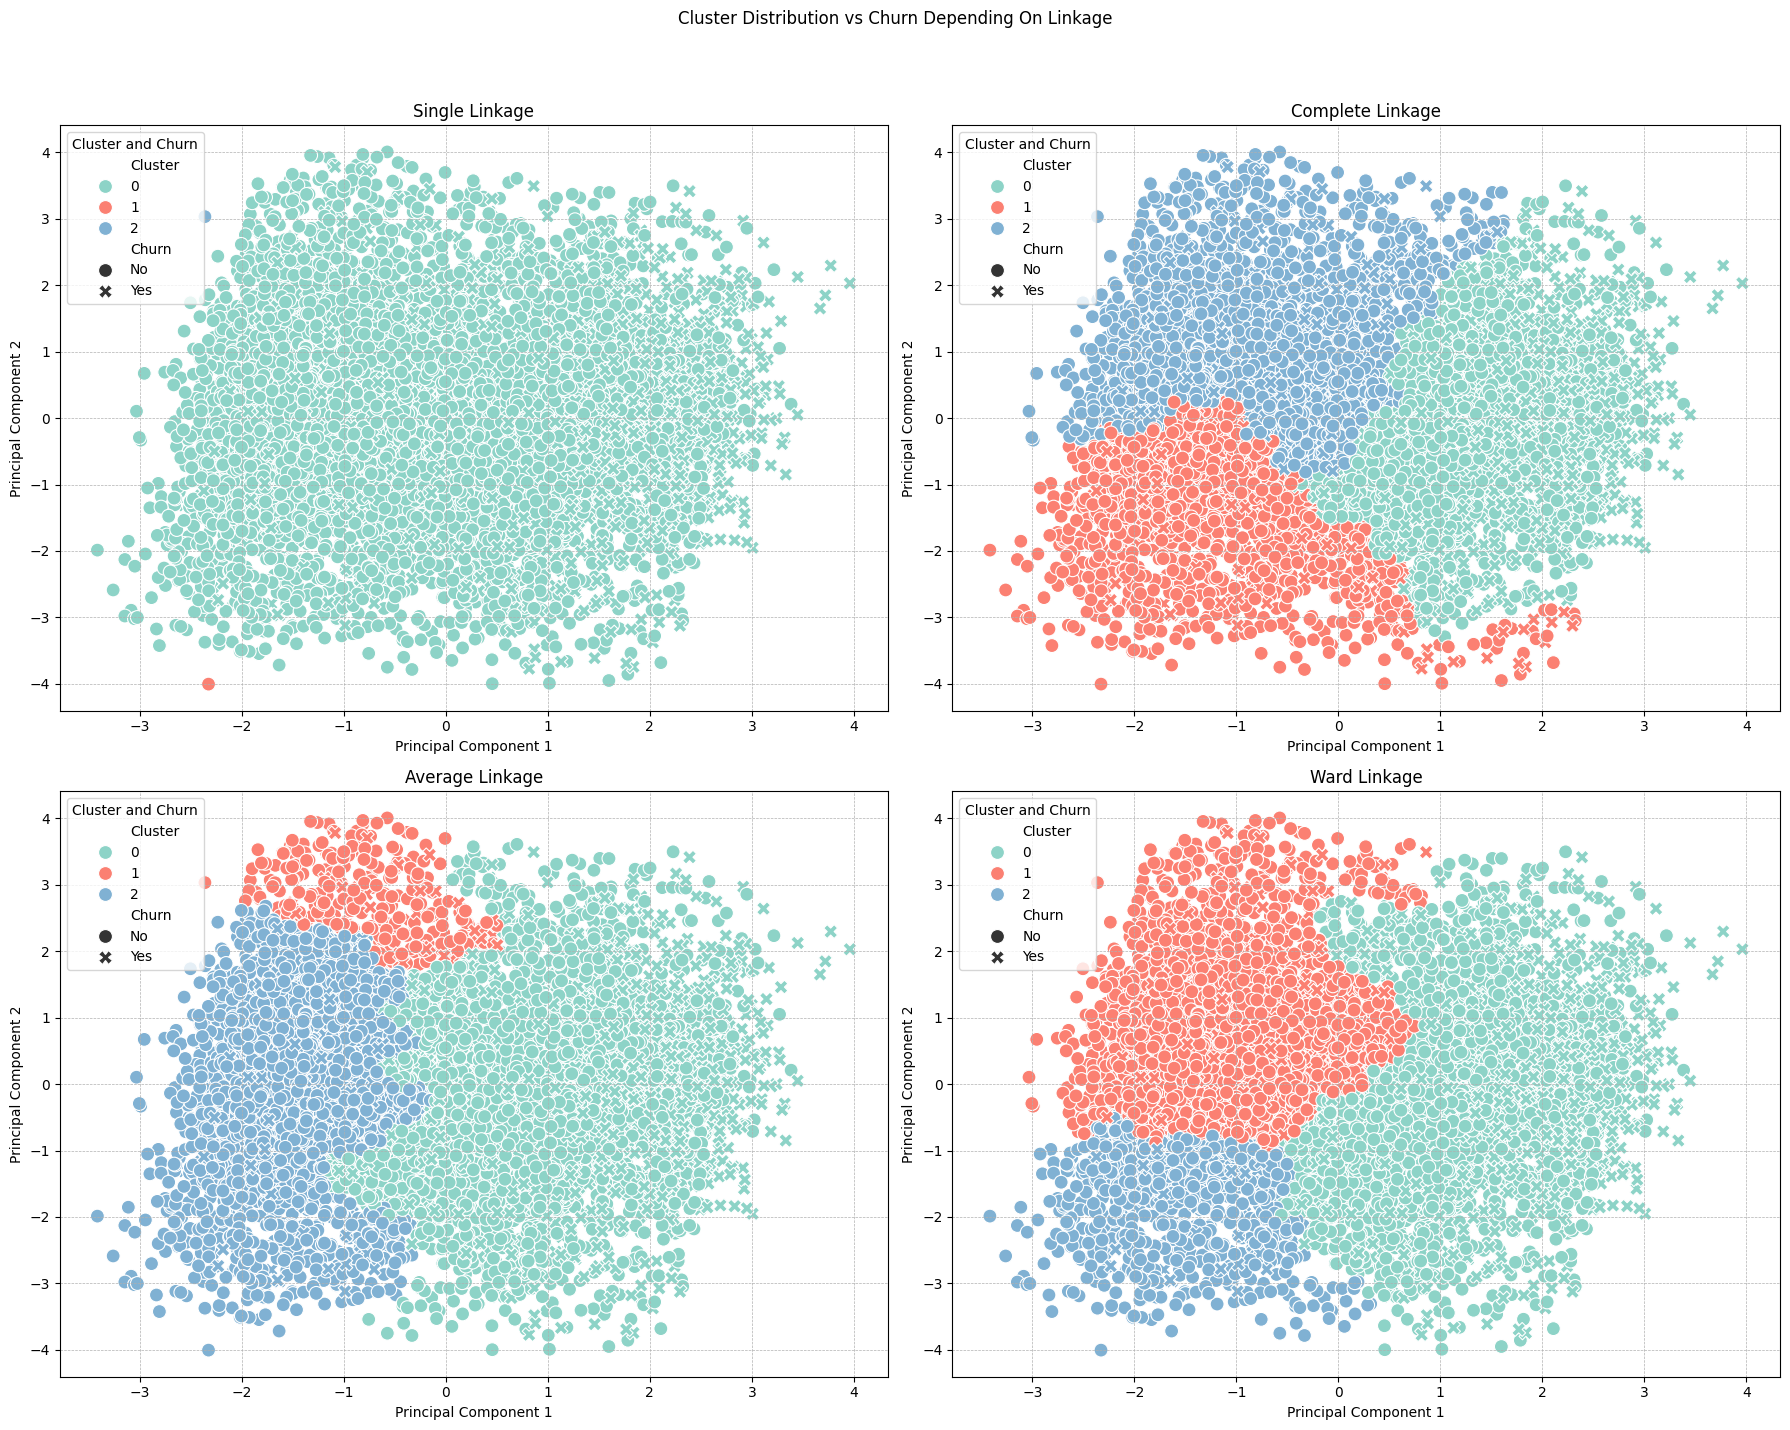

In [140]:
fig, axes = plt.subplots(2, 2, figsize=(18, 15))
fig.suptitle('Cluster Distribution vs Churn Depending On Linkage')

cluster_labels = {}
for i, linkage in enumerate(linkages):
    clustering_model = AgglomerativeClustering(n_clusters = 3, linkage = linkage)
    clustering_model.fit(df_scaled_pca)
    clusters = clustering_model.labels_
    cluster_labels[linkage] = clusters

    cluster_churn = pd.DataFrame(df_scaled_pca, columns=['PCA1', 'PCA2'])
    cluster_churn['Cluster'] = clusters
    cluster_churn['Churn'] = y.apply(lambda x: 'Yes' if x == 1 else 'No')

    row, col = divmod(i, 2)
    sns.scatterplot(data = cluster_churn, x = 'PCA1', y = 'PCA2', hue = 'Cluster', style = 'Churn', palette = cluster_palette, s = 100, ax = axes[row, col])
    axes[row, col].set_title(f'{linkage.capitalize()} Linkage')
    axes[row, col].set_xlabel('Principal Component 1')
    axes[row, col].set_ylabel('Principal Component 2')
    axes[row, col].legend(title='Cluster and Churn', loc='best')
    axes[row, col].grid(True, which = "both", ls = "--", linewidth = 0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [141]:
silhouette_scores = {}

# Perform clustering and calculate silhouette score for each linkage method
for linkage in linkages:
    clustering_model = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    clustering_model.fit(df_scaled_pca)
    score = silhouette_score(df_scaled_pca, clustering_model.labels_)
    silhouette_scores[linkage] = score

# The best linkage method is the one with the highest silhouette score
best_linkage = max(silhouette_scores, key=silhouette_scores.get)
best_score = silhouette_scores[best_linkage]

best_linkage, best_score, silhouette_scores

('complete',
 0.3476786149281811,
 {'single': 0.2468386724280338,
  'complete': 0.3476786149281811,
  'average': 0.3113832919800227,
  'ward': 0.33759521240905427})

El mejor método de `linkage` para el caso dado es `complete` dado que es el que presenta una mayor puntuación de silueta. Ello indica que los clientes agrupados coinciden correctamente con el grupo al que han sido asignados y no coinciden con el resto de grupos vecinos.

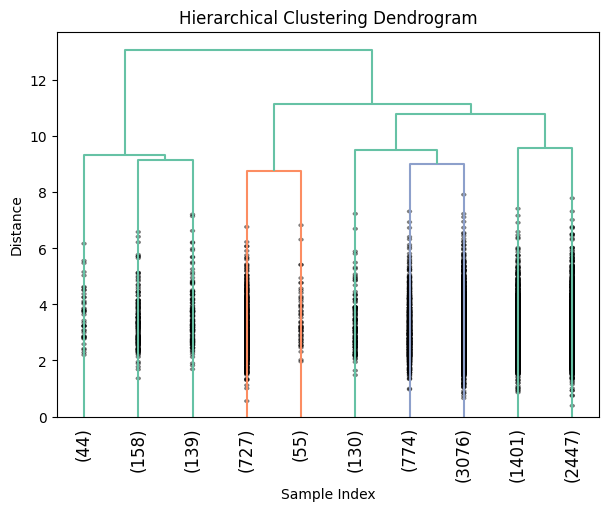

In [142]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(df_scaled, method = 'complete', metric = 'euclidean')

sns.set_palette('Set2')
fig, ax = plt.subplots(figsize=(7, 5))
dendrogram(
    linkage_data,
    truncate_mode = 'lastp',  # or 'level'
    p = 10,  # Adjust `p` to change the number of clusters to show
    show_leaf_counts = True,
    leaf_rotation = 90.,
    leaf_font_size = 12.,
    show_contracted = True
)
ax.set_title("Hierarchical Clustering Dendrogram", fontsize = 12)
ax.set_xlabel('Sample Index')
ax.set_ylabel('Distance')
plt.show()

## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 7.4. Clustering Analysis</span>

In [143]:
df_clusters = df.copy()
df_clusters["Cluster"] = cluster_labels['complete'] if 'complete' in cluster_labels else None

df_clusters.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0   Existing Customer            45      M                3     High School   
5   Existing Customer            44      M                2        Graduate   
9   Existing Customer            48      M                2        Graduate   
10  Existing Customer            42      M                5      Uneducated   
11  Existing Customer            65      M                1         Unknown   

   Marital_Status Income_Category Card_Category  Months_on_book  \
0         Married     $60K - $80K          Blue              39   
5         Married     $40K - $60K          Blue              36   
9          Single    $80K - $120K          Blue              36   
10        Unknown         $120K +          Blue              31   
11        Married     $40K - $60K          Blue              54   

    Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                          5                       1                      3   
5                          3                       1                      2   
9                          6                       3                      3   
10                         5                       3                      2   
11                         6                       2                      3   

    Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
0        12691.0                  777                 1.335             1144   
5         4010.0                 1247                 1.376             1088   
9        11656.0                 1677                 1.524             1441   
10        6748.0                 1467                 0.831             1201   
11        9095.0                 1587                 1.433             1314   

    Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Cluster  
0               42                1.625                  0.061        0  
5               24                0.846                  0.311        1  
9               32                0.882                  0.144        2  
10              42                0.680                  0.217        0  
11              26                1.364                  0.174        2

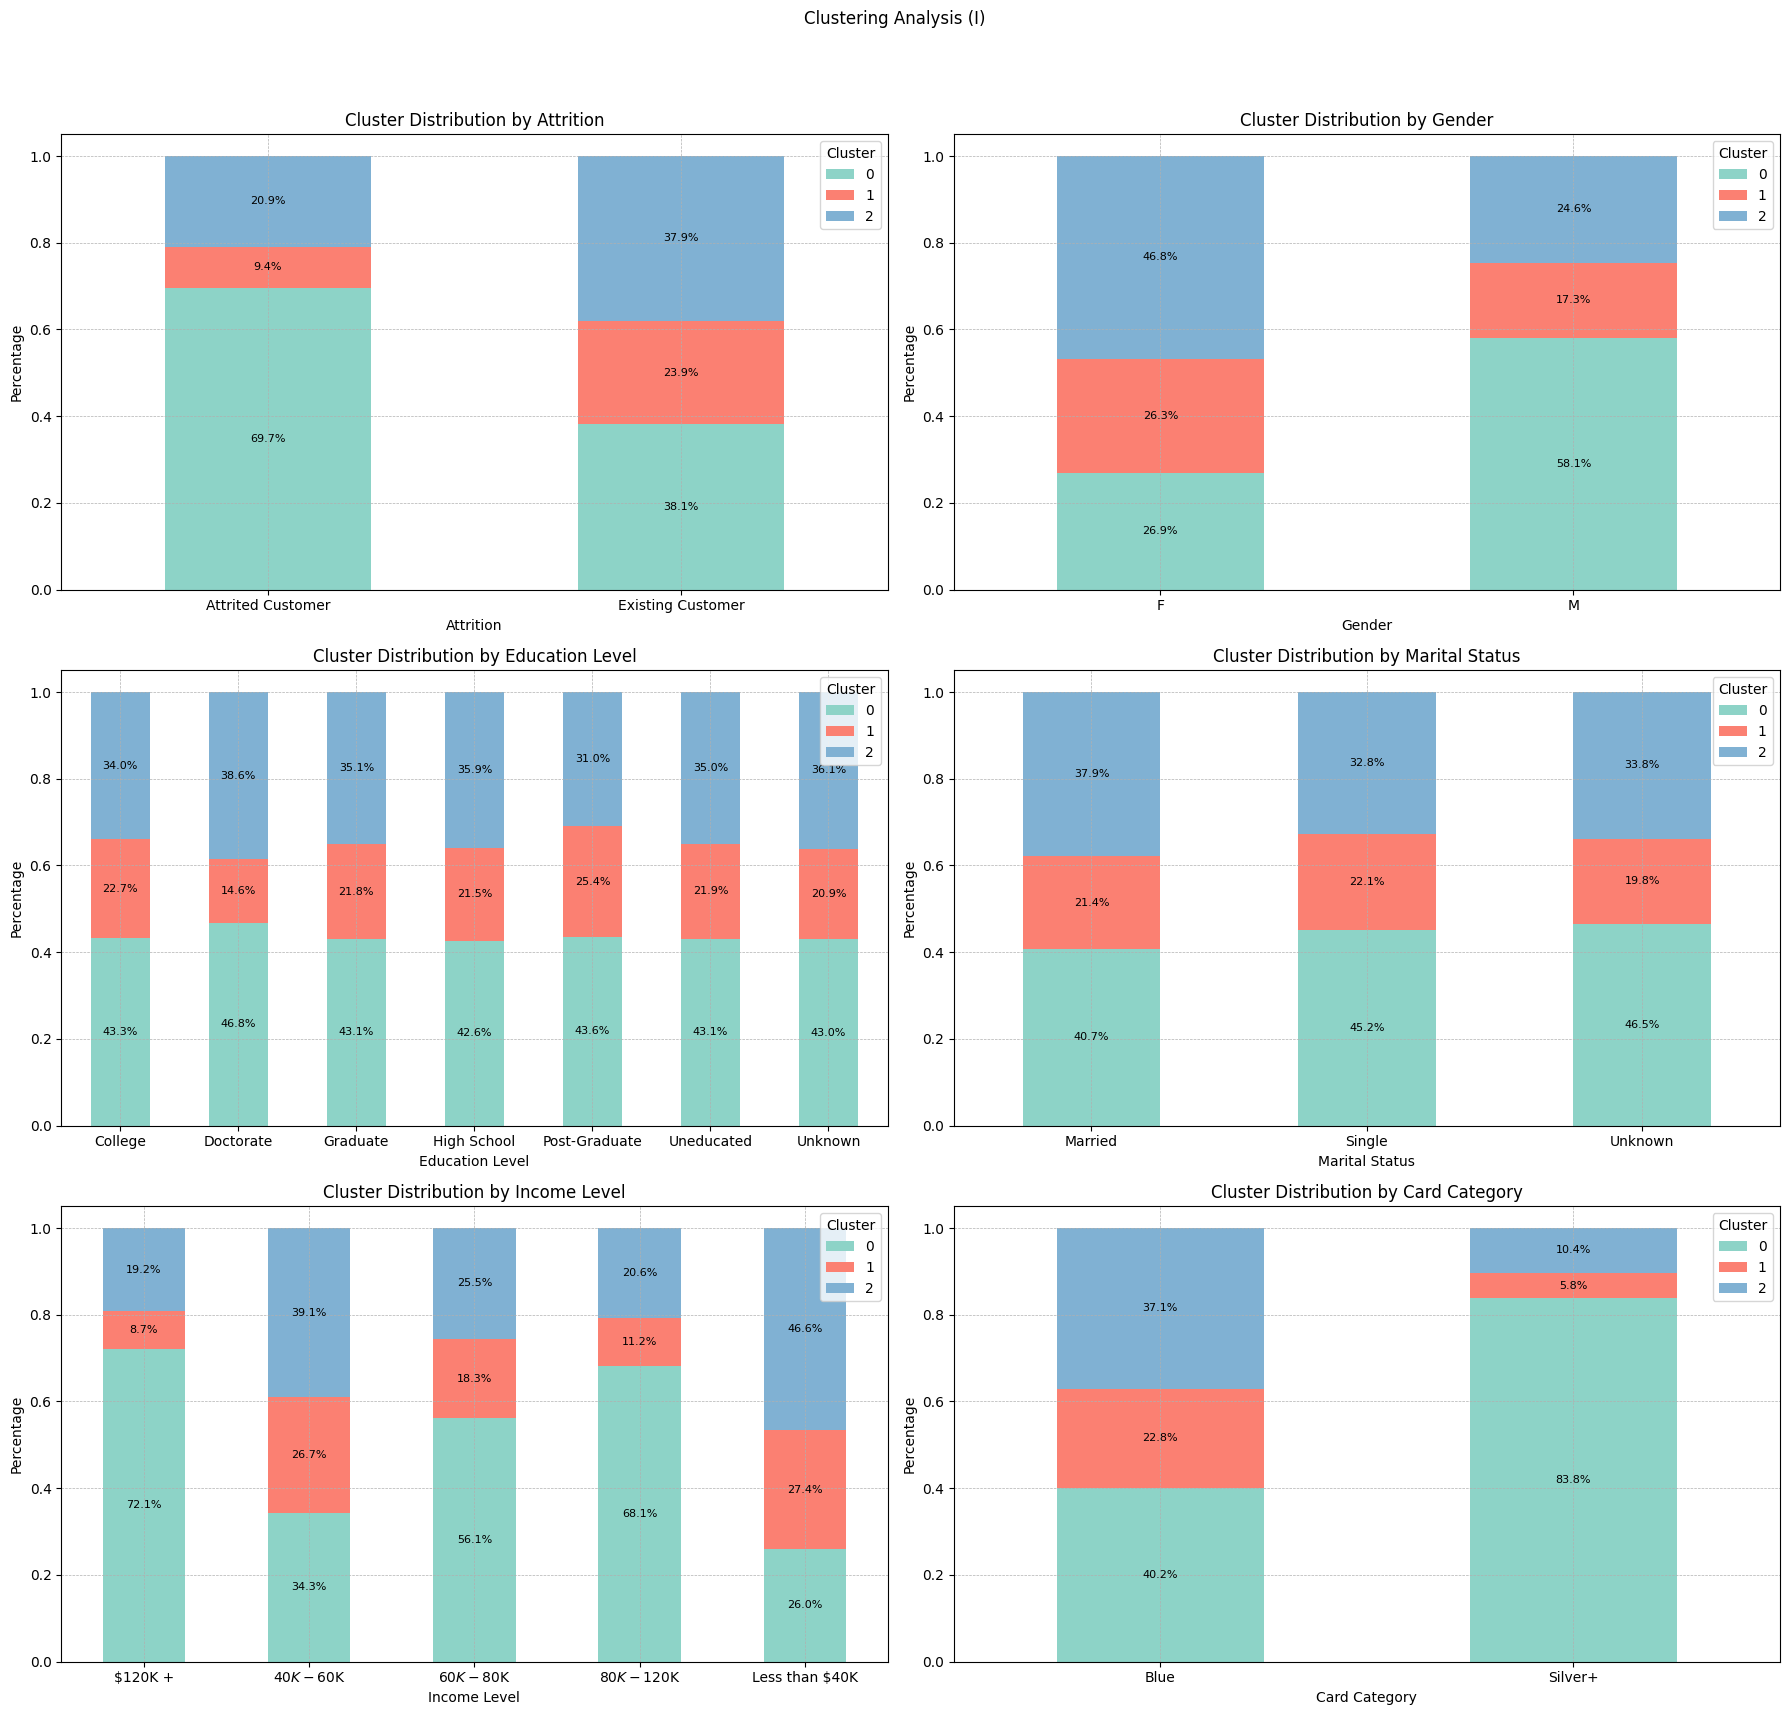

In [144]:
def prepare_stacked_bar_data(df, category_col, cluster_col):
    # Calculate the count of each group
    group_size = df.groupby([category_col, cluster_col]).size().unstack(fill_value=0)
    # Calculate the percentage of each category within each cluster
    percentage_data = group_size.divide(group_size.sum(axis=1), axis=0)
    return percentage_data

def plot_stacked_bar(data, ax, title, xlabel):
    # Plotting the data
    data.plot(kind = 'bar', stacked = True, ax = ax, color = cluster_palette)
 
    # Adding annotations
    for bar in ax.patches:
        bar_x = bar.get_x() + bar.get_width() / 2
        bar_y = bar.get_y() + bar.get_height() / 2
        percentage = f'{bar.get_height() * 100:.1f}%'
        if bar.get_height() > 0.01:  # This filters out the negligible percentages
            ax.text(bar_x, bar_y, percentage, ha = 'center', va = 'center', fontsize = 8, color = 'black')

    # Setting chart title and labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Percentage')
    ax.grid(True, which="both", ls="--", linewidth=0.5)
    ax.tick_params(axis = 'x', labelrotation=0)

fig, axes = plt.subplots(3, 2, figsize=(18, 18))
fig.suptitle('Clustering Analysis (I)')

# Creating subplots for each category
for i, (col, name) in enumerate(nominal_categories.items()):
    ax = axes[i//2, i%2]
    percentage_data = prepare_stacked_bar_data(df_clusters, col, 'Cluster')
    plot_stacked_bar(percentage_data, ax, f'Cluster Distribution by {name}', name)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


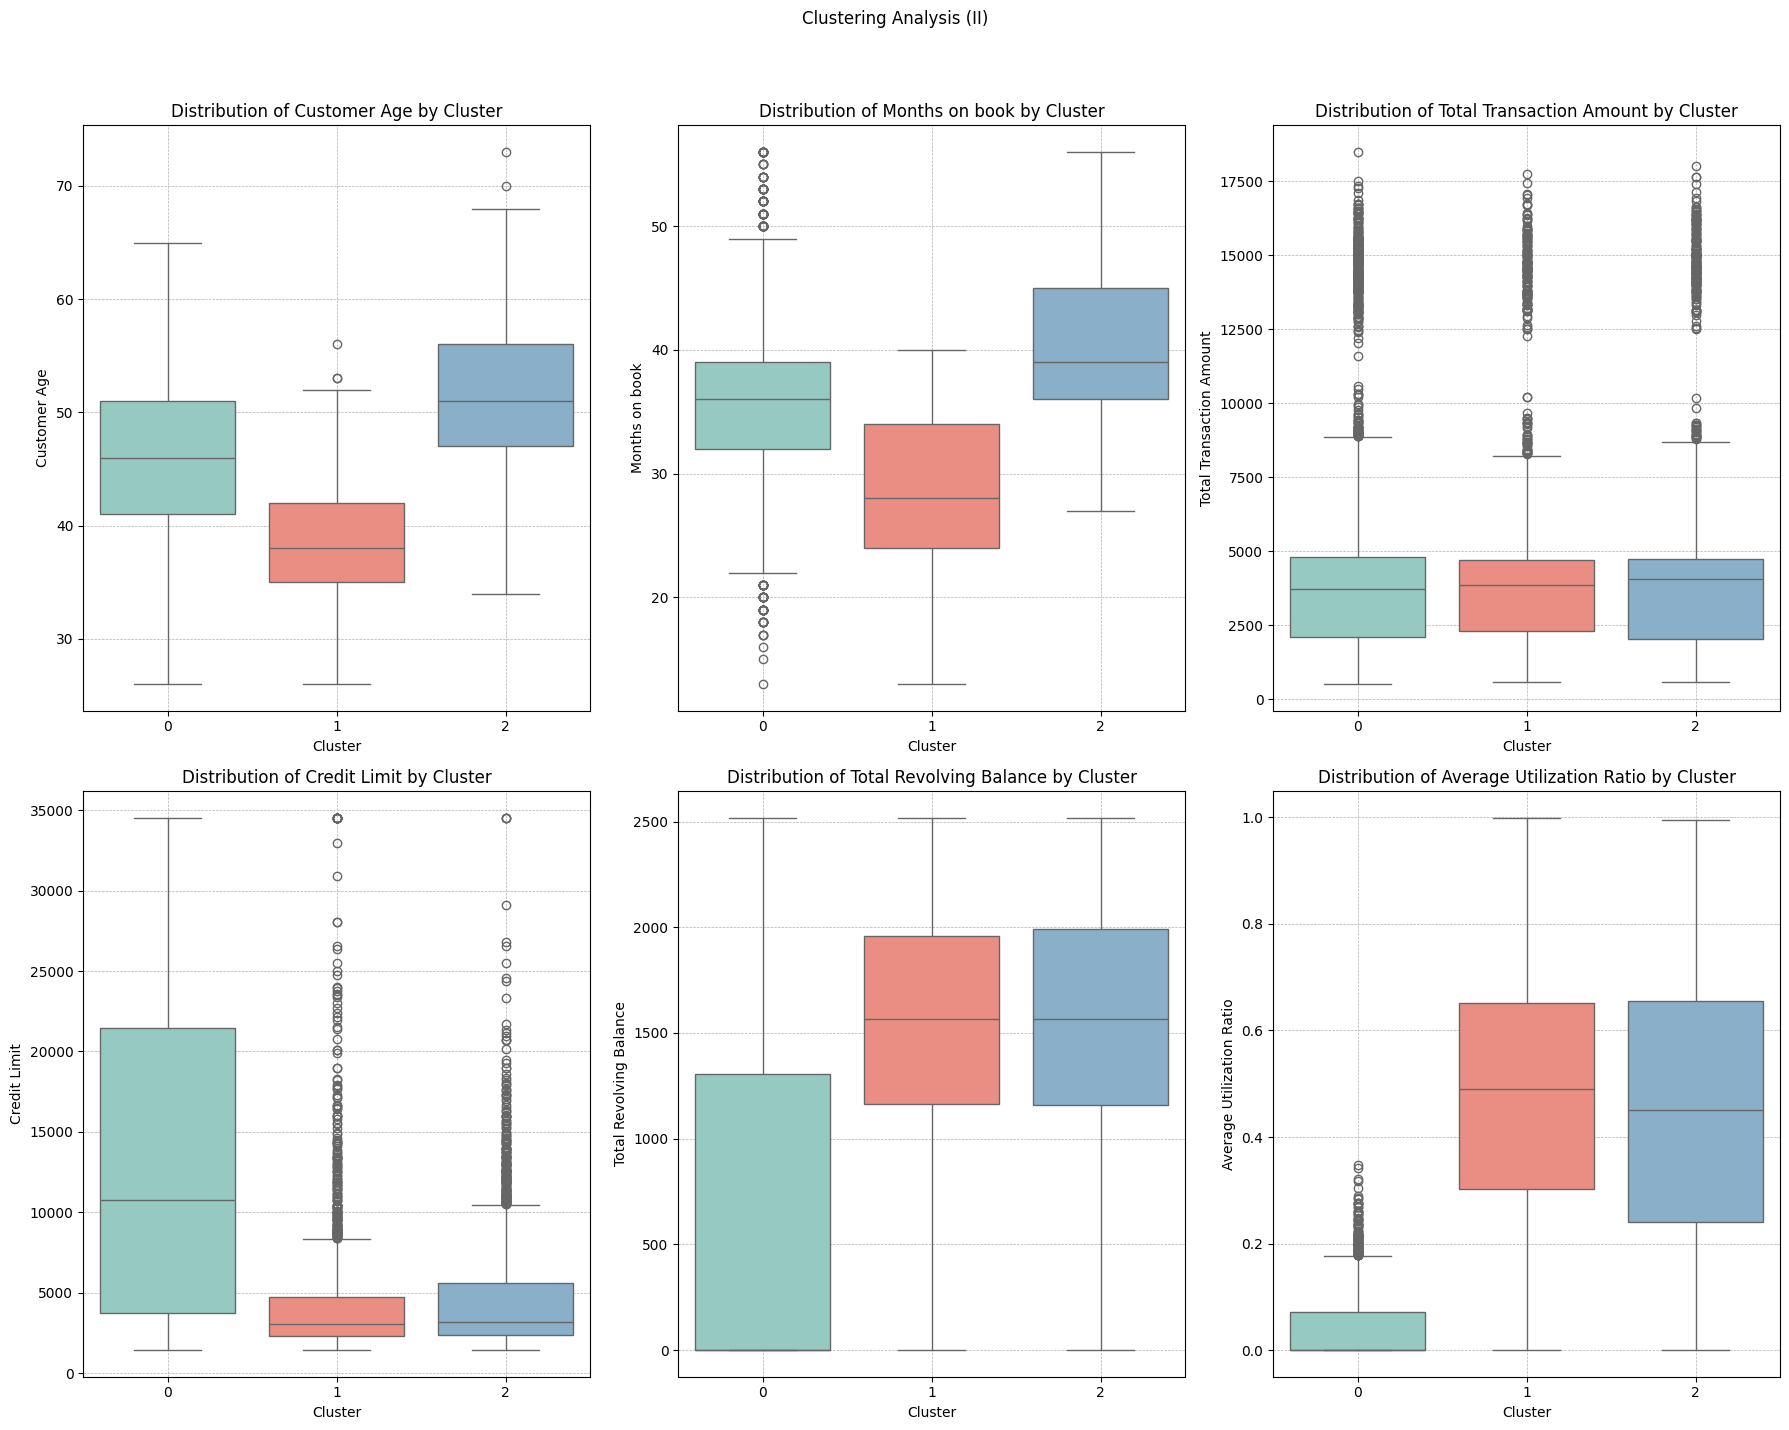

In [145]:
numerical_categories = {
    'Customer_Age': 'Customer Age',
    'Months_on_book': 'Months on book',
    'Total_Trans_Amt': 'Total Transaction Amount',
    'Credit_Limit': 'Credit Limit',
    'Total_Revolving_Bal': 'Total Revolving Balance',
    'Avg_Utilization_Ratio': 'Average Utilization Ratio'
}

# Creating the figure and axes for a 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(18, 15))
fig.suptitle('Clustering Analysis (II)')

# Loop over the dictionary items and create a boxplot for each category
for i, (column_key, column_name) in enumerate(numerical_categories.items()):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(x = 'Cluster', y = column_key, data = df_clusters, ax = ax, palette = cluster_palette)
    ax.set_title(f'Distribution of {column_name} by Cluster')
    ax.set_xlabel('Cluster')
    ax.set_ylabel(column_name)
    ax.grid(True, which="both", ls="--", linewidth=0.5)

# Adjust layout to prevent overlap and to allocate space for titles and legends
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 8. Neural Networks </span>

## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 8.1. Multi-Layer Perceptron (MLP)</span>

In [102]:
from sklearn.neural_network import MLPClassifier

# Grid for Different Number of Neurons
param_grid = {'hidden_layer_sizes':[5, 10, 20, 30, 40, 50]}

grid = GridSearchCV(
        estimator = MLPClassifier(
                        learning_rate_init = 0.01,
                        solver = 'adam',
                        alpha = 0,
                        max_iter = 1000,
                        random_state = 42
                    ),
        param_grid = param_grid,
        scoring = 'accuracy',
        cv = 5,
        refit = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=MLPClassifier(alpha=0, learning_rate_init=0.01,
                                     max_iter=1000, random_state=42),
             param_grid={'hidden_layer_sizes': [5, 10, 20, 30, 40, 50]},
             return_train_score=True, scoring='accuracy')

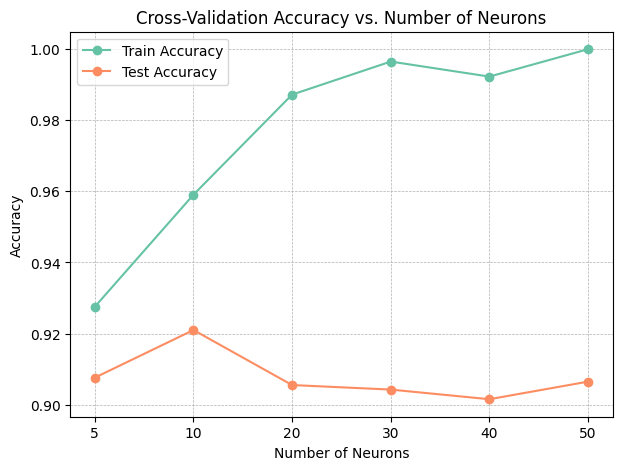

In [103]:
sns.set_palette("Set2")

fig, ax = plt.subplots(figsize=(7, 5))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_hidden_layer_sizes', y='mean_train_score', ax=ax, label='Train Accuracy', marker = "o")
scores.plot(x='param_hidden_layer_sizes', y='mean_test_score', ax=ax, label='Test Accuracy', marker = "o")
ax.set_ylabel('Accuracy')
ax.set_xlabel('Number of Neurons')
ax.set_title('Cross-Validation Accuracy vs. Number of Neurons', fontsize = 12)
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

In [104]:
# Grid for Different Learning Rates
param_grid = {'learning_rate_init':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(
        estimator = MLPClassifier(
                        hidden_layer_sizes = (40),
                        solver = 'adam',
                        alpha  = 0,
                        max_iter = 1000,
                        random_state = 42
                    ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=MLPClassifier(alpha=0, hidden_layer_sizes=40,
                                     max_iter=1000, random_state=42),
             param_grid={'learning_rate_init': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                                100]},
             return_train_score=True, scoring='accuracy')

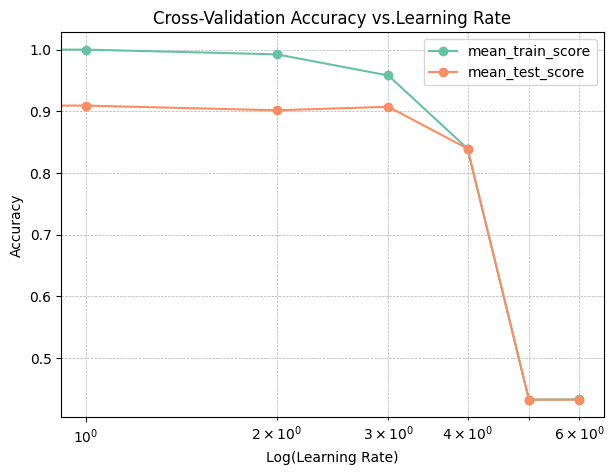

In [105]:
fig, ax = plt.subplots(figsize=(7, 5))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_learning_rate_init', y='mean_train_score', ax=ax, marker = "o")
scores.plot(x='param_learning_rate_init', y='mean_test_score', ax=ax, marker = "o")
ax.set_xscale('log')
ax.set_xlabel('Log(Learning Rate)')
ax.set_ylabel('Accuracy')
ax.set_title('Cross-Validation Accuracy vs.Learning Rate', fontsize = 12)
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

In [106]:
from sklearn.model_selection import RandomizedSearchCV

# Space search of each hyperparameter
param_distributions = {
    'hidden_layer_sizes': [(40), (40, 10), (40, 20), (40, 30), (40, 40)],
    'alpha': np.logspace(-3, 3, 7),
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Cross-Validation 
grid = RandomizedSearchCV(
        estimator  = MLPClassifier(solver = 'adam', max_iter = 1000),
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = 3, 
        verbose    = 0,
        random_state = 42,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

RandomizedSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'hidden_layer_sizes': [40, (40, 10),
                                                               (40, 20),
                                                               (40, 30),
                                                               (40, 40)],
                                        'learning_rate_init': [0.001, 0.01,
                                                               0.1]},
                   random_state=42, return_train_score=True,
                   scoring='accuracy')

In [107]:
# Grid results
results = pd.DataFrame(grid.cv_results_)
results.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

param_learning_rate_init param_hidden_layer_sizes param_alpha  \
0                     0.001                       40         0.1   
40                      0.1                 (40, 10)         0.1   
21                     0.01                 (40, 30)         1.0   
19                      0.1                 (40, 30)        0.01   
4                     0.001                       40         1.0   
43                     0.01                 (40, 10)         0.1   
26                    0.001                       40        0.01   
24                      0.1                 (40, 40)         0.1   
11                     0.01                       40         0.1   
45                     0.01                 (40, 40)         0.1   

    mean_test_score  std_test_score  mean_train_score  std_train_score  
0          0.917158        0.005427          0.988667         0.001272  
40         0.913966        0.002493          0.927773         0.003635  
21         0.913649        0.006254          0.938387         0.005330  
19         0.911572        0.003918          0.957781         0.001975  
4          0.911093        0.002165          0.919473         0.001082  
43         0.909018        0.003063          0.990423         0.007094  
26         0.908858        0.002375          0.999521         0.000517  
24         0.906943        0.002305          0.920351         0.002505  
11         0.906783        0.002793          0.985954         0.002603  
45         0.906304        0.003197          0.986992         0.013657

In [108]:
# Best MLP model selected
mlp_model = grid.best_estimator_

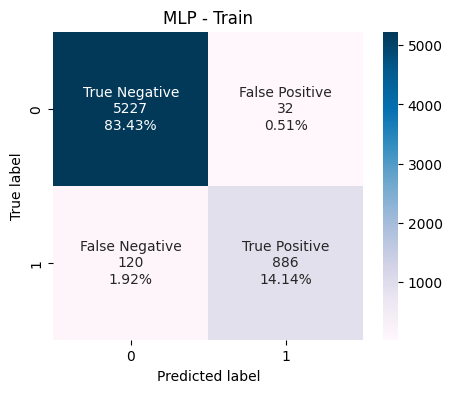

In [109]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train, mlp_model.predict(X_train), labels = mlp_model.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('MLP - Train', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

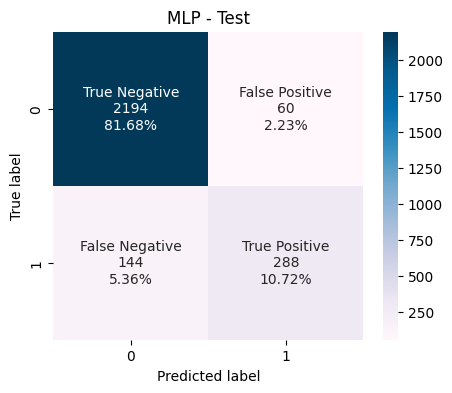

In [110]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, mlp_model.predict(X_test), labels = mlp_model.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('MLP - Test', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

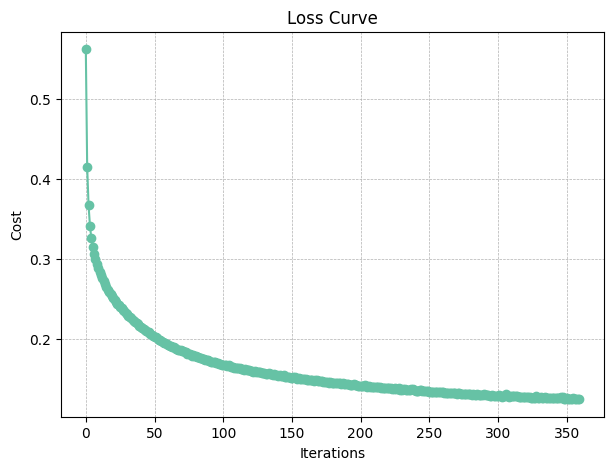

In [111]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(mlp_model.loss_curve_, "o-")
ax.set_title('Loss Curve', fontsize = 12)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 8.2. Tensorflow </span>

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

mlp_tf = Sequential([
    Dense(128, activation = 'relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation = 'relu'),
    Dropout(0.5),
    Dense(32, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')  # Sigmoid for binary output
])

In [123]:
mlp_tf.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',  # Binary cross-entropy for binary classification
    metrics = ['accuracy']
)

In [124]:
history = mlp_tf.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 50,
    batch_size = 32
)

Epoch 1/50
 71/196 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.6677 - loss: 0.6288  

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7500 - loss: 0.5380 - val_accuracy: 0.8392 - val_loss: 0.3436
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.8420 - loss: 0.4000 - val_accuracy: 0.8771 - val_loss: 0.3094
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.8697 - loss: 0.3355 - val_accuracy: 0.8920 - val_loss: 0.2907
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.8758 - loss: 0.3286 - val_accuracy: 0.8984 - val_loss: 0.2738
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.8840 - loss: 0.3056 - val_accuracy: 0.9025 - val_loss: 0.2633
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.8940 - loss: 0.2881 - val_accuracy: 0.9028 - val_loss: 0.2568
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.8926 - loss: 0.2875 - val_accuracy: 0.9032 - val_loss: 0.2528
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.8974 - loss: 0.2787 - val_accuracy:

84/84 - 0s - 465us/step - accuracy: 0.9200 - loss: 0.2554
Test Accuracy: 0.919955313205719


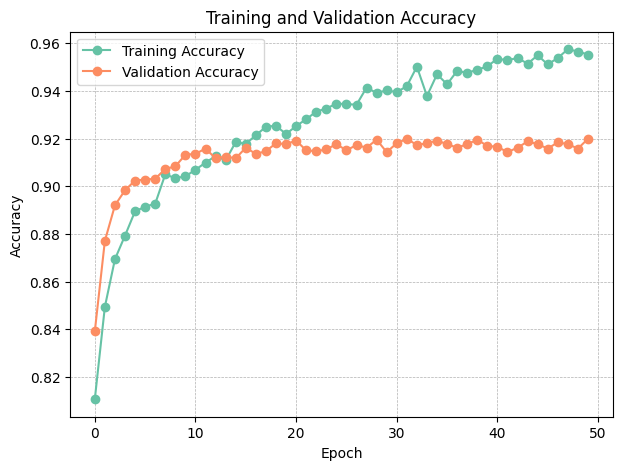

In [125]:
# Evaluate the model
test_loss, test_acc = mlp_tf.evaluate(X_test, y_test, verbose = 2)
print(f"Test Accuracy: {test_acc}")

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(history.history['accuracy'], label = 'Training Accuracy', marker = "o")
ax.plot(history.history['val_accuracy'], label = 'Validation Accuracy', marker = "o")
ax.set_title('Training and Validation Accuracy', fontsize = 12)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend()
plt.show()

Test Loss: 0.2554023861885071


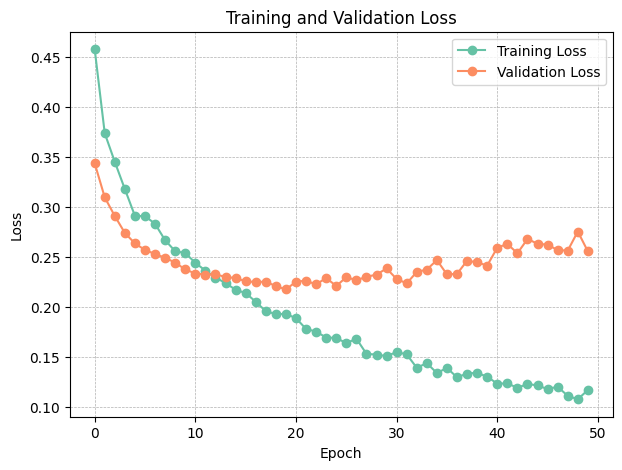

In [126]:
# Evaluate the model
print(f"Test Loss: {test_loss}")

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(history.history['loss'], label = 'Training Loss', marker = "o")
ax.plot(history.history['val_loss'], label = 'Validation Loss', marker = "o")
ax.set_title('Training and Validation Loss', fontsize = 12)
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend()
plt.show()

196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step


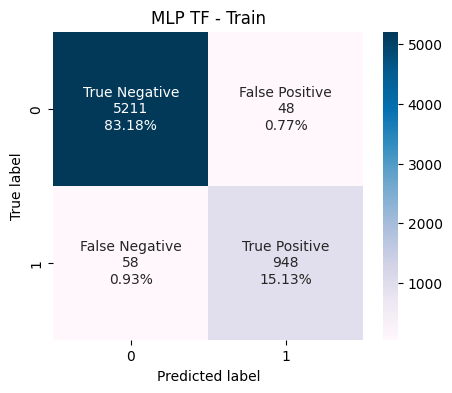

In [127]:
mlp_tf_train_predicted_classes = (mlp_tf.predict(X_train) > 0.5).astype('float64').flatten()

# Calculate the confusion matrix using the true labels and predicted classes
cm = confusion_matrix(y_train, mlp_tf_train_predicted_classes)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('MLP TF - Train', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step


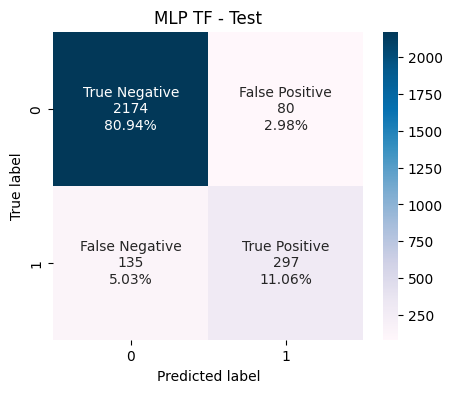

In [128]:
mlp_tf_test_predicted_classes = (mlp_tf.predict(X_test) > 0.5).astype('float64').flatten()

# Calculate the confusion matrix using the true labels and predicted classes
cm = confusion_matrix(y_test, mlp_tf_test_predicted_classes)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('MLP TF - Test', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()


## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 8.3. Classification Report </span>

In [129]:
print(
    classification_report(
        y_true = y_test,
        y_pred = mlp_tf_test_predicted_classes
    )
)

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      2254
         1.0       0.79      0.69      0.73       432

    accuracy                           0.92      2686
   macro avg       0.86      0.83      0.84      2686
weighted avg       0.92      0.92      0.92      2686



In [130]:
mlp_tf_predictions = pd.DataFrame(data = mlp_tf_test_predicted_classes, columns=['1'])

# Churn Classification using MLP with various thresholds
mlp_tf_predictions['classification_default_0.5'] = (mlp_tf_predictions['1'] > 0.5).astype(int)
mlp_tf_predictions['classification_custom_0.8'] = (mlp_tf_predictions['1'] > 0.8).astype(int)
mlp_tf_predictions['classification_custom_0.9'] = (mlp_tf_predictions['1'] > 0.9).astype(int)
mlp_tf_predictions.head(20)


1  classification_default_0.5  classification_custom_0.8  \
0   0.0                           0                          0   
1   0.0                           0                          0   
2   0.0                           0                          0   
3   0.0                           0                          0   
4   0.0                           0                          0   
5   0.0                           0                          0   
6   0.0                           0                          0   
7   0.0                           0                          0   
8   1.0                           1                          1   
9   1.0                           1                          1   
10  0.0                           0                          0   
11  0.0                           0                          0   
12  0.0                           0                          0   
13  0.0                           0                          0   
14  0.0                           0                          0   
15  0.0                           0                          0   
16  0.0                           0                          0   
17  1.0                           1                          1   
18  0.0                           0                          0   
19  0.0                           0                          0   

    classification_custom_0.9  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  
5                           0  
6                           0  
7                           0  
8                           1  
9                           1  
10                          0  
11                          0  
12                          0  
13                          0  
14                          0  
15                          0  
16                          0  
17                          1  
18                          0  
19                          0

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step


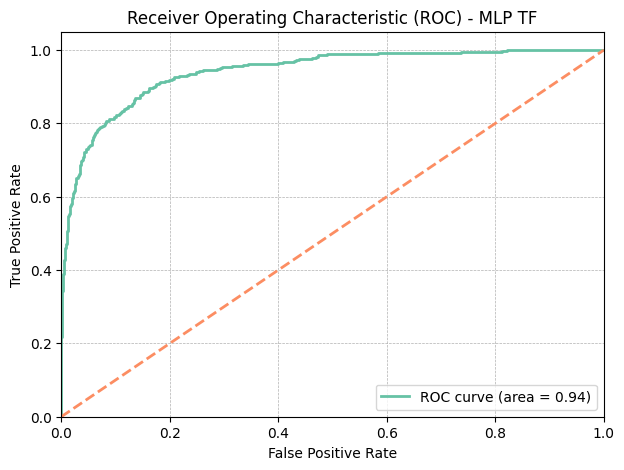

In [131]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, mlp_tf.predict(X_test))
roc_auc = auc(fpr, tpr)

# Create the ROC curve plot with the same style
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax.plot([0, 1], [0, 1], lw=2, linestyle='--')

# Customize the plot to match the given style (titles, labels, legend, grid)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) - MLP TF', fontsize = 12)
ax.legend(loc="lower right")

# Use the grid style and linewidth as in the example
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 9. Conclusions </span>

## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 9.1. Metrics' Comparison </span>

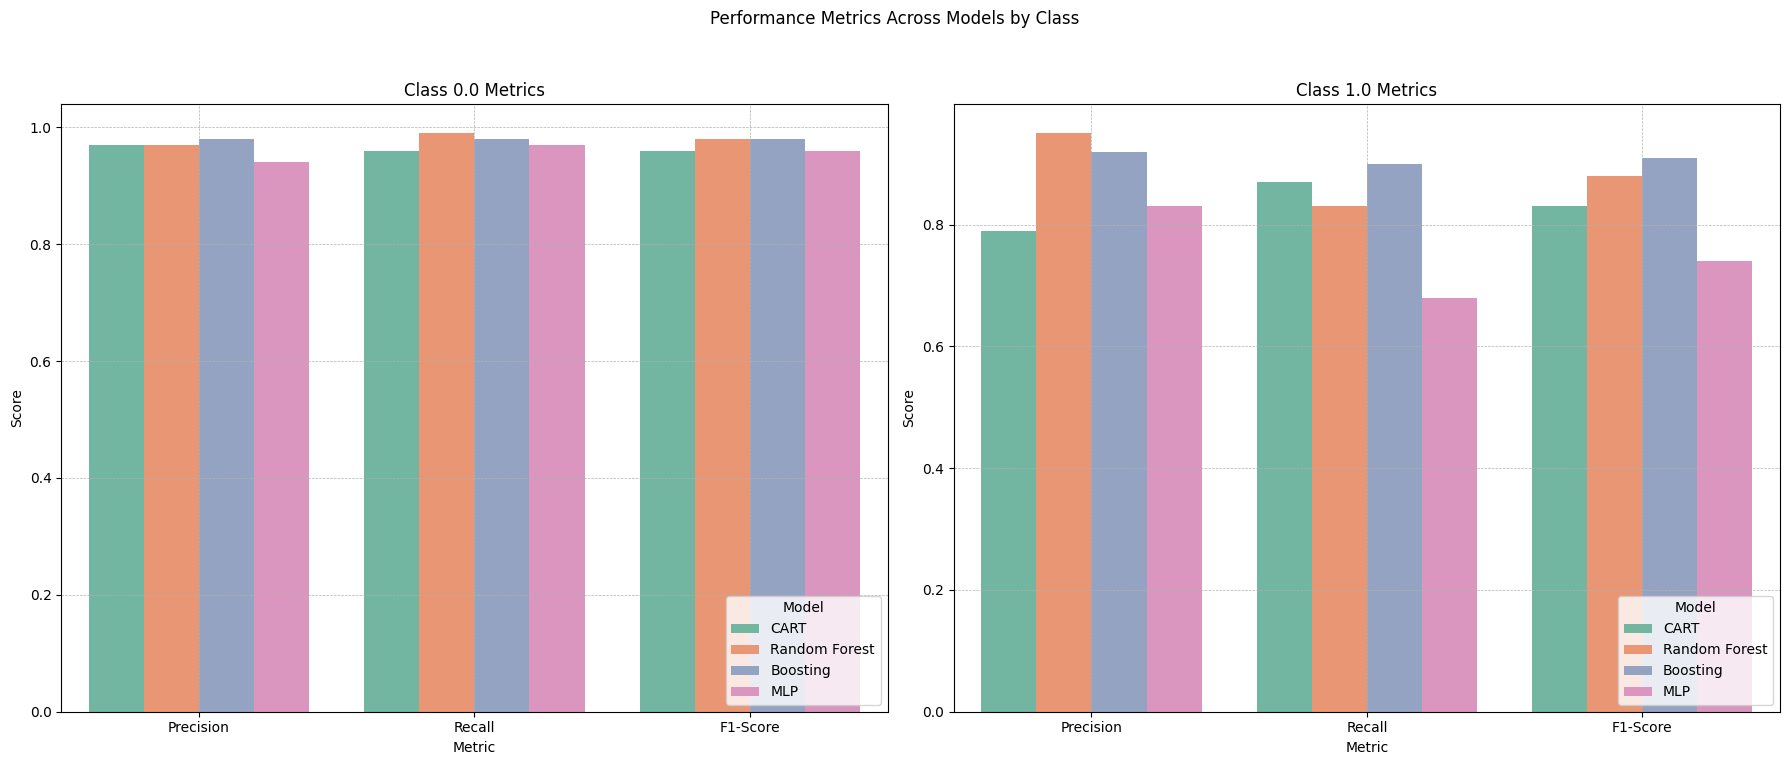

In [163]:
warnings.filterwarnings("ignore")  # To suppress warnings in the output

# Define the data
data = {
    'Model': ['CART', 'Random Forest', 'Boosting', 'MLP'] * 3,
    'Class': ['0.0', '0.0', '0.0', '0.0', '1.0', '1.0', '1.0', '1.0', 'Accuracy', 'Accuracy', 'Accuracy', 'Accuracy'],
    'Precision': [0.97, 0.97, 0.98, 0.94, 0.79, 0.95, 0.92, 0.83, None, None, None, None],
    'Recall': [0.96, 0.99, 0.98, 0.97, 0.87, 0.83, 0.90, 0.68, None, None, None, None],
    'F1-Score': [0.96, 0.98, 0.98, 0.96, 0.83, 0.88, 0.91, 0.74, None, None, None, None],
}

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Filter out 'Accuracy' from 'Class' and None values from scores
df_filtered = df[df['Class'].isin(['0.0', '1.0']) & df['Precision'].notna()]

# Melt the DataFrame to make it suitable for sns.barplot
df_melted = df_filtered.melt(id_vars=['Model', 'Class'], var_name='Metric', value_name='Score')

# Subplot area
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # Adjust subplot layout
fig.suptitle('Performance Metrics Across Models by Class')

# Plotting class 0.0
sns.barplot(data=df_melted[df_melted['Class'] == '0.0'], x='Metric', y='Score', hue='Model', ax=axes[0])
axes[0].set_title('Class 0.0 Metrics')
axes[0].set_xlabel('Metric')
axes[0].set_ylabel('Score')
axes[0].legend(title='Model', loc='lower right')
axes[0].grid(True, which="both", ls="--", linewidth=0.5)

# Plotting class 1.0
sns.barplot(data=df_melted[df_melted['Class'] == '1.0'], x='Metric', y='Score', hue='Model', ax=axes[1])
axes[1].set_title('Class 1.0 Metrics')
axes[1].set_xlabel('Metric')
axes[1].set_ylabel('Score')
axes[1].legend(title='Model', loc='lower right')
axes[1].grid(True, which="both", ls="--", linewidth=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make sure there's no overlap
plt.show()

En contextos donde las clases están desbalanceadas, como es el caso de los datasets de churn donde un porcentaje mucho menor de clientes abandona el servicio (clase 1) en comparación con los que se quedan (clase 0), métricas como la precisión pueden no ser tan informativas. Esto se debe a que un modelo podría simplemente predecir que todos los clientes se quedan (la clase mayoritaria), obteniendo una alta precisión pero sin capturar a aquellos clientes que realmente abandonan el servicio, que es el evento de interés.

El *recall* se convierte en una métrica crucial bajo estas circunstancias porque mide la proporción de positivos reales que se han identificado correctamente. En el caso del churn, esto se traduciría en qué tan bien el modelo es capaz de capturar a todos los clientes que efectivamente abandonarán el servicio. Un *recall* alto indica que el modelo es capaz de detectar una alta proporción de los verdaderos abandonos, lo cual es deseable para poder tomar acciones preventivas.

El *F1-Score* es una métrica que combina precisión y recall en un promedio armónico, proporcionando una medida de la calidad del modelo en términos de equilibrio entre ambas. Dado que el recall es importante en situaciones de desequilibrio de clases, el *F1-Score* se convierte en un indicador aún más crítico de rendimiento ya que asegura que no se está sacrificando la precisión por un recall alto y viceversa.

Los modelos de Boosting y Random Forest exhiben un *F1-Score* relativamente alto para la clase 1 en comparación con los modelos CART y MLP. Esto significa que, a pesar del desequilibrio de clases, estos modelos no solo están identificando una fracción significativa de los verdaderos abandonos (alto recall), sino que también mantienen una precisión decente. En otras palabras, no solo detectan a muchos de los clientes que se van, sino que cuando predicen que un cliente se irá, es probable que estén en lo correcto.

Boosting y Random Forest, al ser algoritmos que agregan múltiples modelos (árboles en su caso), son capaces de capturar complejidades y patrones en los datos que modelos más simples podrían pasar por alto. Esto los hace especialmente adecuados para situaciones con clases desbalanceadas y, combinado con técnicas como el muestreo ponderado o el boosting enfocado en los errores, los hace robustos frente a las disparidades en la distribución de las clases.

## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 9.2. Confusion Matrices Comparison </span>

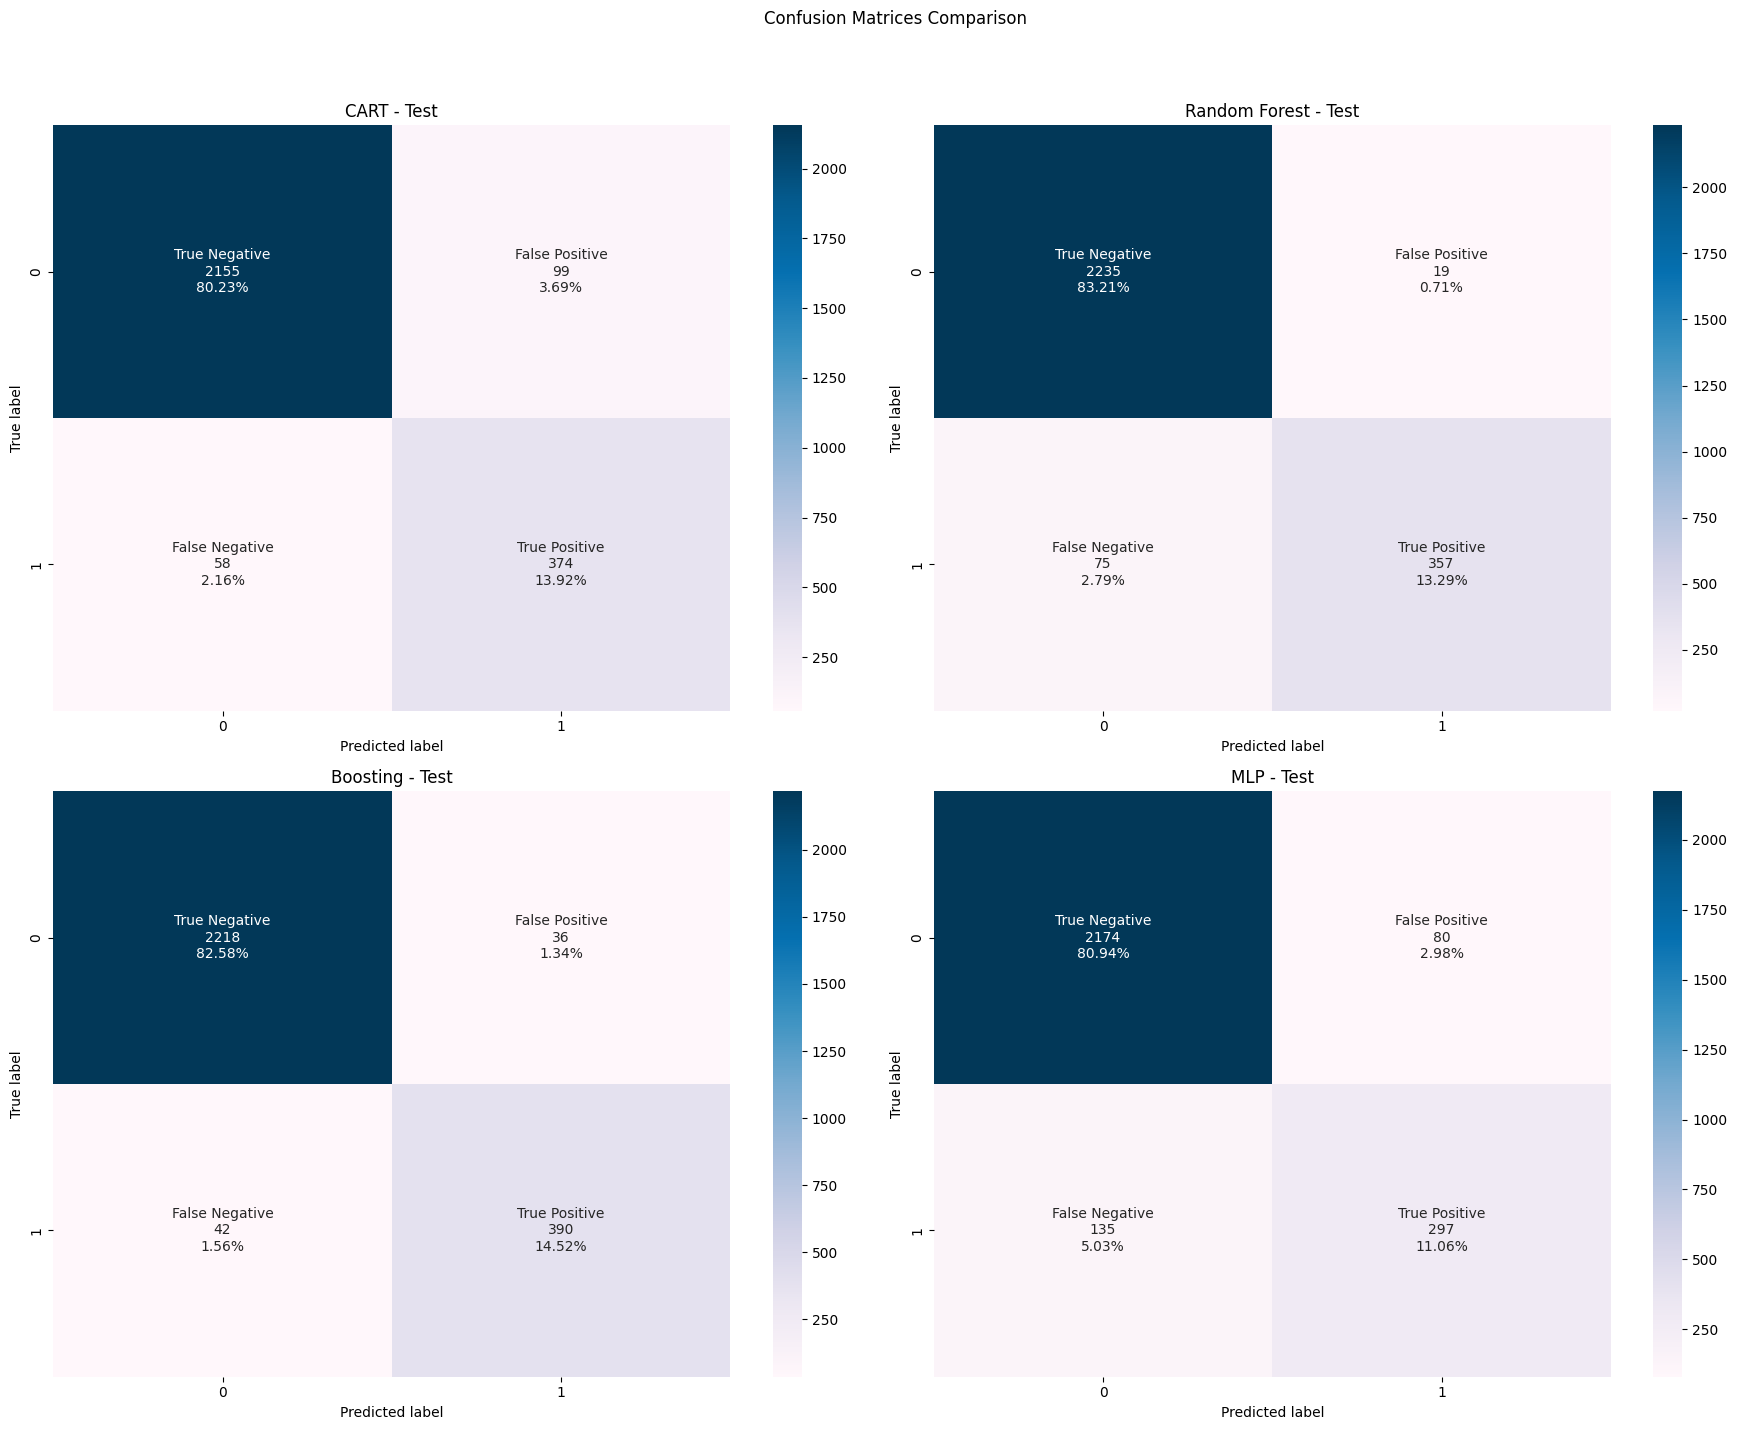

In [165]:
# Define function to plot confusion matrix
def plot_confusion_matrix(ax, y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
    ax.set_title(f'{model_name} - Test', fontsize=12)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')

# Subplot area
fig, axes = plt.subplots(2, 2, figsize=(18, 15))
fig.suptitle('Confusion Matrices Comparison')

# Plotting each confusion matrix
plot_confusion_matrix(axes[0, 0], y_test, pruned_tree_I.predict(X_test), "CART")
plot_confusion_matrix(axes[0, 1], y_test, rf_model.predict(X_test), "Random Forest")
plot_confusion_matrix(axes[1, 0], y_test, gbc_model.predict(X_test), "Boosting")
plot_confusion_matrix(axes[1, 1], y_test, mlp_tf_test_predicted_classes, "MLP")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Las matrices de confusión muestran más detalles sobre el comportamiento de cada modelo. Los modelos CART y MLP presentan una tasa más alta de falsos negativos para la clase 1. Esto significa que tienden a clasificar a los clientes que abandonarán como si no lo fueran a hacer, lo cual puede ser problemático para el banco que busca aplicar estrategias de retención. 

Por otro lado, los modelos Random Forest y Boosting muestran un mejor equilibrio en la detección de los clientes que abandonan, minimizando los falsos negativos, lo cual es crucial ya que permite actuar sobre los clientes en riesgo antes de que se vayan.

## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 9.3. ROC Performance Comparison </span>

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step


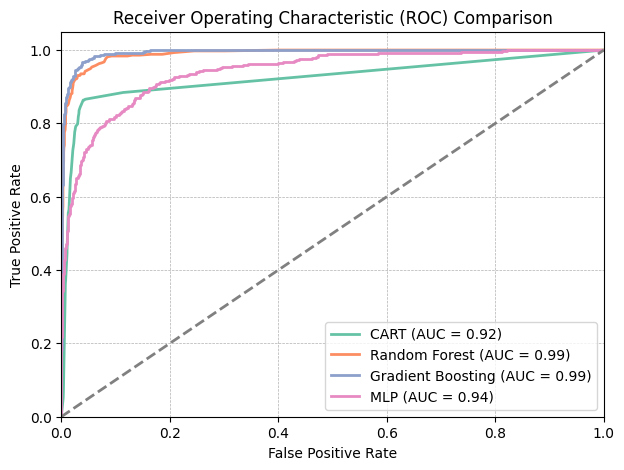

In [166]:
# Calculate ROC curve
fpr_cart, tpr_cart, thresholds = roc_curve(y_test, cart_predictions['1'])
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, rf_predictions['1'])
fpr_gbc, tpr_gbc, thresholds = roc_curve(y_test, gbc_predictions['1'])
fpr_mlp, tpr_mlp, thresholds = roc_curve(y_test, mlp_tf.predict(X_test))

roc_auc_cart = auc(fpr_cart, tpr_cart)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Create the ROC curve plot with the same style
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(fpr_cart, tpr_cart, label=f'CART (AUC = {roc_auc_cart:.2f})', lw=2)
ax.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', lw=2)
ax.plot(fpr_gbc, tpr_gbc, label=f'Gradient Boosting (AUC = {roc_auc_gbc:.2f})', lw=2)
ax.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {roc_auc_mlp:.2f})', lw=2)
ax.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')

# Customize the plot to match the given style (titles, labels, legend, grid)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Comparison', fontsize = 12)
ax.legend(loc="lower right")

# Use the grid style and linewidth as in the example
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()

La última gráfica es la curva ROC, que compara la capacidad de los modelos para discriminar entre las clases. Aquí, tanto Random Forest como Boosting muestran un AUC (Área Bajo la Curva) cercano a la perfección, demostrando su robustez y su capacidad para diferenciar efectivamente entre clientes que abandonarán y los que no. 

Esto es especialmente importante en un contexto de clases desbalanceadas, ya que un alto AUC indica que el modelo es capaz de mantener un buen rendimiento en la detección de verdaderos positivos mientras mantiene bajos los falsos positivos.